In [77]:
'''
Final Project Tutorial

Joed Quaye
Ronald Chomnou
Mark Spooner
Griffin Araujo
'''
# necessary imports

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import requests
import numpy as np
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
import re
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import statsmodels.api as sm


# looking at the past 6 seasons for data analysis
URL2324 = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
URL2223 = "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"
URL2122 = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
URL2021 = "https://www.basketball-reference.com/leagues/NBA_2021_per_game.html"
URL1920 = "https://www.basketball-reference.com/leagues/NBA_2020_per_game.html"
URL1819 = "https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"

URLMIP1920 = "https://www.basketball-reference.com/awards/awards_2020.html"
URLMIP2021 = "https://www.basketball-reference.com/awards/awards_2021.html"
URLMIP2122 = "https://www.basketball-reference.com/awards/awards_2022.html"
URLMIP2223 = "https://www.basketball-reference.com/awards/awards_2023.html"
URLMIP2324 = "https://www.basketball-reference.com/awards/awards_2024.html"

# URL1718 = "https://www.basketball-reference.com/leagues/NBA_2018_per_game.html"

                                                                                    Introduction
The primary goal of this project is to guide you through the comprehensive process of data analysis within the context of basketball performance metrics. Our focus will be on evaluating the performance data of basketball players over the past six years, specifically to identify trends and correlations that can help predict the Most Improved Player (MIP) in future seasons. The MIP award is given annually to the player who has shown the most significant improvement in their performance, making it an intriguing subject for data-driven analysis.

Why is this important? Recognizing and predicting the Most Improved Player can provide valuable insights into player development, scouting, and team strategy. Understanding the factors that contribute to a player's improvement can help teams invest in potential stars early, optimize training programs, and enhance overall team performance. Moreover, fans and analysts alike can gain a deeper appreciation for the game's dynamics and the players' growth trajectories.

Throughout this project, we will utilize a variety of data science techniques to analyze player statistics, performance metrics, and other relevant data points. By examining past MIP winners and comparing their performance data to other players, we aim to uncover patterns and predictive indicators. Our analysis will focus on several key aspects:

Data Collection: Gathering comprehensive player data from the past six years, including points per game, offensive and defensive rebounds, assists, blocks, and steals.
Data Cleaning and Preparation: Ensuring the data is accurate, complete, and formatted for analysis.
Exploratory Data Analysis (EDA): Visualizing and summarizing the data to identify trends, anomalies, and initial insights.
Feature Engineering: Creating new variables and metrics that might be significant predictors of improvement.
Modeling and Prediction: Applying various statistical and machine learning models to predict future MIP candidates based on historical data.
Evaluation and Interpretation: Assessing the performance of our models and interpreting the results to draw meaningful conclusions.
By following this structured approach, we aim to provide a robust analysis that not only identifies potential future MIP candidates but also enhances our understanding of the factors driving player improvement in professional basketball.

                                                                        Data Collection
Our task is to gather the necessary datasets for our analysis. Our project aims to analyze basketball player performance data over the past six years and compare it to the Most Improved Player (MIP) of each year to identify trends and correlations that could help predict future MIP winners.

To achieve this, we need comprehensive performance data for each player from the last six seasons, as well as the MIP rankings for those seasons. We will use web scraping techniques to collect this data from reliable sports statistics websites. Python, along with libraries such as BeautifulSoup and Selenium, will be instrumental in this process.

Player Statistics Data Scraping

The following function takes a URL and returns a dictionary with the corresponding player data as output:

In [78]:
# function takes in a URL and returns a dictionary with corresponding data as output 
def data_scrape(URL):
    # new webdriver
    driver = webdriver.Safari()
    driver.get(URL)

    # reading the data as HTML
    html = BeautifulSoup(driver.page_source, 'html.parser')
    table = html.find('table', {'id': 'per_game_stats'})

    player_stats = {}
    temp = {} 
    usedTOT = False

    body = table.find('tbody')
    rows = body.find_all('tr')

    # some are duplicates
    for row in rows:
        try:
            # cells obtains all the column data of each row 
            cells = row.find_all('td')
            # for each row, get appropriate stat (according to column location) and append 
            # first instance of td is the names 
            player_name = cells[0].text.strip()

            # taking into account whether the player played for multiple teams 
            if cells[3].text == 'TOT': 
                temp[player_name] = {}
                temp[player_name]["position"] = cells[1].text.strip()
                temp[player_name]["age"] = cells[2].text.strip()
                temp[player_name]["games played"] = cells[4].text.strip()
                temp[player_name]["games started"] = cells[5].text.strip()
                temp[player_name]["minutes played per game"] = cells[6].text.strip()
                temp[player_name]["field goals"] = cells[7].text.strip()
                temp[player_name]["field goal attempts"] = cells[8].text.strip()
                temp[player_name]["fg percentage"] = cells[9].text.strip()
                temp[player_name]["3pt per game"] = cells[10].text.strip()
                temp[player_name]["3pt attempts"] = cells[11].text.strip()
                temp[player_name]["3pt percentage"] = cells[12].text.strip()
                temp[player_name]["2pt per game"] = cells[13].text.strip()
                temp[player_name]["2pt attempts"] = cells[14].text.strip()
                temp[player_name]["2pt percentage"] = cells[15].text.strip()
                temp[player_name]["effective fg percentage"] = cells[16].text.strip()
                temp[player_name]["free throws"] = cells[17].text.strip()
                temp[player_name]["free throw attempts"] = cells[18].text.strip()
                temp[player_name]["free throw percentage"] = cells[19].text.strip()
                temp[player_name]["offensive rebounds"] = cells[20].text.strip()
                temp[player_name]["defensive rebounds"] = cells[21].text.strip()
                temp[player_name]["total rebounds"] = cells[22].text.strip()
                temp[player_name]["assists"] = cells[23].text.strip()
                temp[player_name]["steals"] = cells[24].text.strip()
                temp[player_name]["blocks"] = cells[25].text.strip()
                temp[player_name]["turnovers"] = cells[26].text.strip()
                temp[player_name]["personal fouls"] = cells[27].text.strip()
                temp[player_name]["ppg"] = cells[28].text.strip()
                usedTOT = True
                continue 
            # taking into account whether the person played for multiple teams (only keeping first)
            if player_name in player_stats:
                continue
            player_stats[player_name] = {}
            player_stats[player_name]["position"] = temp[player_name]["position"] if usedTOT else cells[1].text.strip()
            player_stats[player_name]["age"] = temp[player_name]["age"] if usedTOT else cells[2].text.strip()
            player_stats[player_name]["team"] = cells[3].text.strip()
            player_stats[player_name]["games played"] = temp[player_name]["games played"] if usedTOT else cells[4].text.strip()
            player_stats[player_name]["games started"] = temp[player_name]["games started"] if usedTOT else cells[5].text.strip()
            player_stats[player_name]["minutes played per game"] = temp[player_name]["minutes played per game"] if usedTOT else cells[6].text.strip()
            player_stats[player_name]["field goals"] = temp[player_name]["field goals"] if usedTOT else cells[7].text.strip()
            player_stats[player_name]["field goal attempts"] = temp[player_name]["field goal attempts"] if usedTOT else cells[8].text.strip()
            player_stats[player_name]["fg percentage"] = temp[player_name]["fg percentage"] if usedTOT else cells[9].text.strip()
            player_stats[player_name]["3pt per game"] = temp[player_name]["3pt per game"] if usedTOT else cells[10].text.strip()
            player_stats[player_name]["3pt attempts"] = temp[player_name]["3pt attempts"] if usedTOT else cells[11].text.strip()
            player_stats[player_name]["3pt percentage"] = temp[player_name]["3pt percentage"] if usedTOT else cells[12].text.strip()
            player_stats[player_name]["2pt per game"] = temp[player_name]["2pt per game"] if usedTOT else cells[13].text.strip()
            player_stats[player_name]["2pt attempts"] = temp[player_name]["2pt attempts"] if usedTOT else cells[14].text.strip()
            player_stats[player_name]["2pt percentage"] = temp[player_name]["2pt percentage"] if usedTOT else cells[15].text.strip()
            player_stats[player_name]["effective fg percentage"] = temp[player_name]["effective fg percentage"] if usedTOT else cells[16].text.strip()
            player_stats[player_name]["free throws"] = temp[player_name]["free throws"] if usedTOT else cells[17].text.strip()
            player_stats[player_name]["free throw attempts"] = temp[player_name]["free throw attempts"] if usedTOT else cells[18].text.strip()
            player_stats[player_name]["free throw percentage"] = temp[player_name]["free throw percentage"] if usedTOT else cells[19].text.strip()
            player_stats[player_name]["offensive rebounds"] = temp[player_name]["offensive rebounds"] if usedTOT else cells[20].text.strip()
            player_stats[player_name]["defensive rebounds"] = temp[player_name]["defensive rebounds"] if usedTOT else cells[21].text.strip()
            player_stats[player_name]["total rebounds"] = temp[player_name]["total rebounds"] if usedTOT else cells[22].text.strip()
            player_stats[player_name]["assists"] = temp[player_name]["assists"] if usedTOT else cells[23].text.strip()
            player_stats[player_name]["steals"] = temp[player_name]["steals"] if usedTOT else cells[24].text.strip()
            player_stats[player_name]["blocks"] = temp[player_name]["blocks"] if usedTOT else cells[25].text.strip()
            player_stats[player_name]["turnovers"] = temp[player_name]["turnovers"] if usedTOT else cells[26].text.strip()
            player_stats[player_name]["personal fouls"] = temp[player_name]["personal fouls"] if usedTOT else cells[27].text.strip()
            player_stats[player_name]["ppg"] = temp[player_name]["ppg"] if usedTOT else cells[28].text.strip()
            usedTOT = False
        except:
            continue

    driver.quit()
    # returning the player stats
    return player_stats

# obtaing all season data
first_season = data_scrape(URL2324)
second_season = data_scrape(URL2223)
third_season = data_scrape(URL2122)
fourth_season = data_scrape(URL2021)
fifth_season = data_scrape(URL1920)
sixth_season = data_scrape(URL1819)

Collecting MIP Rankings

The function below scrapes MIP rankings data from the given URL stored in URLMIP1920, URLMIP2021, URLMIP2122, URLMIP2223, URLMIP2324 corresponding to each year.

In [80]:
# Scrape data for all the MIP ranked tables for last 5 seasons
def mip_scrape(URL):

    driver = webdriver.Safari()

    driver.get(URL)

    # Parse the HTML content of the page
    html = BeautifulSoup(driver.page_source, 'html.parser')

    # Find the table containing the most improved players
    table = html.find('table', {'id': 'mip'})

    mipMap = {}
    body = table.find('tbody')
    
    # Extract the table rows
    rows = body.find_all('tr')
    for row in rows:
        rank = row.find('th').text.strip()
        cells = row.find_all('td')
        mipRank = cells[0].text.strip()
        mipMap[mipRank] = {}
        # Removes the T from the ranking that indicates you are tied in voting in the tables
        mipMap[mipRank]["Rank"] = re.sub(r'\D','',rank)

    driver.quit()
    return mipMap

mipTable1920 = mip_scrape(URLMIP1920)
mipTable2021 = mip_scrape(URLMIP2021)
mipTable2122 = mip_scrape(URLMIP2122)
mipTable2223 = mip_scrape(URLMIP2223)
mipTable2324 = mip_scrape(URLMIP2324)

In this section, we utilize Pandas and NumPy to manipulate and organize our dataframes, which are structured as Pandas-based objects. If you're new to these libraries, you can explore their functionalities through the following documentation:

Pandas Documentation
NumPy Documentation
Our goal here is to clean and organize the player statistics and MIP rankings data collected from various seasons into a format that is ready for analysis.

Creating DataFrames from Dictionaries

First, we convert the scraped dictionaries into Pandas DataFrames. Each dictionary represents the data for a specific season, and we use pd.DataFrame.from_dict to perform the conversion. The orient='index' parameter ensures that the dictionary keys become the index of the DataFrame.


Display Settings

To ensure we can view the entire contents of the DataFrames, we adjust the display settings of Pandas to show all rows and columns. This helps in verifying the completeness and correctness of our data.

Displaying DataFrames

We define functions to display the head and tail of each DataFrame. This provides a quick overview of the data and helps in verifying that the data has been loaded correctly.

In [81]:
# creating dataframe based off created dictionary
data2324 = pd.DataFrame.from_dict(first_season, orient='index')
data2223 = pd.DataFrame.from_dict(second_season, orient='index')
data2122 = pd.DataFrame.from_dict(third_season, orient='index')
data2021 = pd.DataFrame.from_dict(fourth_season, orient='index')
data1920 = pd.DataFrame.from_dict(fifth_season, orient='index')
data1819 = pd.DataFrame.from_dict(sixth_season, orient='index')

mipdata2324 = pd.DataFrame.from_dict(mipTable2324, orient='index')
mipdata2223 = pd.DataFrame.from_dict(mipTable2223, orient='index')
mipdata2122 = pd.DataFrame.from_dict(mipTable2122, orient='index')
mipdata2021 = pd.DataFrame.from_dict(mipTable2021, orient='index')
mipdata1920 = pd.DataFrame.from_dict(mipTable1920, orient='index')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

count = 24
mipcount = 24
# now printing dataframe data
def data_display(dataframe):
    global count
    print("\n" + "20" + str(count - 1) + "-" + str(count) + " SEASON")
    print(dataframe.head())
    print(dataframe.tail())
    count -= 1

def mip_display(dataframe):
    global mipcount
    print("\n" + "20" + str(mipcount - 1) + "-" + str(mipcount) + " SEASON")
    print(dataframe.head())
    print(dataframe.tail())
    mipcount -= 1

data_display(data2324)
data_display(data2223)
data_display(data2122)
data_display(data2021)
data_display(data1920)
data_display(data1819)

mip_display(mipdata2324)
mip_display(mipdata2223)
mip_display(mipdata2122)
mip_display(mipdata2021)
mip_display(mipdata1920)



2023-24 SEASON
                         position age team games played games started  \
Precious Achiuwa             PF-C  24  TOR           74            18   
Bam Adebayo                     C  26  MIA           71            71   
Ochai Agbaji                   SG  23  UTA           78            28   
Santi Aldama                   PF  23  MEM           61            35   
Nickeil Alexander-Walker       SG  25  MIN           82            20   

                         minutes played per game field goals  \
Precious Achiuwa                            21.9         3.2   
Bam Adebayo                                 34.0         7.5   
Ochai Agbaji                                21.0         2.3   
Santi Aldama                                26.5         4.0   
Nickeil Alexander-Walker                    23.4         2.9   

                         field goal attempts fg percentage 3pt per game  \
Precious Achiuwa                         6.3          .501          0.4   
Bam Adebay

Data Processing Second Part
In this part of the data processing section, we focus on extracting the Most Improved Player (MIP) winners from each season's MIP rankings and storing them in a list. This helps us keep track of the players who have won the MIP award over the past five seasons. This step is crucial for our analysis, as it allows us to identify and compare these players' performance metrics against other players. This structured approach allows us to systematically verify and prepare the data for deeper exploration and modeling, setting the foundation for meaningful insights into player performance and the identification of future Most Improved Player candidates.

In [82]:

pastMipWinners = []

def getMipWinners(mipYear, mipArray):
    mipArray.append(mipYear.index[0])
    return mipArray

pastMipWinners = getMipWinners(mipdata1920, pastMipWinners)
pastMipWinners = getMipWinners(mipdata2021, pastMipWinners)
pastMipWinners = getMipWinners(mipdata2122, pastMipWinners)
pastMipWinners = getMipWinners(mipdata2223, pastMipWinners)
pastMipWinners = getMipWinners(mipdata2324, pastMipWinners)
print(pastMipWinners)

['Brandon Ingram', 'Julius Randle', 'Ja Morant', 'Lauri Markkanen', 'Tyrese Maxey']


Create correlation graphs that would be useful to determining most improved player

1. Pure Offensive stats to MIP winners (PPG, assists, O-rebounds, FG%)
2. Pure Defensive stats to MIP winners (Steals, Blocks, D-Rebounds)
3. Impact on game(Games played and minutes increase over seasons, FGA vs FGA)
<!-- 4. Foul call to free throw coefficient -->
<!-- 5. Liability coeffient(turnovers and fouls to games played) -->
<!-- 6. Age development(Age correlation to MIP winners) -->
<!-- 7. Shot selection(EFG%, ) -->
<!-- 8. Position to MIP player correlation -->
9. Prediction of the Most improved player for 2024-2025 season based on coefficients

past 5 Winners
1.  2024	Tyrese Maxey	PG	Philadelphia 76ers	.450	25.9	3.7	    6.2	0.5
2.  2023	Lauri Markkanen	PF	Utah Jazz	        .499	25.6	8.6	    1.9	0.6
3.  2022	Ja Morant	    PG	Memphis Grizzlies	.493	27.4	5.7	    6.7	0.4
4.  2021	Julius Randle	PF	New York Knicks	    .456	24.1	10.2    6.0	0.3
5.  2020	Brandon Ingram	F	New Orleans Pelicans.463	23.8	6.1	    4.2	0.6

Next, we are are going to create graphs that are going to analyze the growth or decline in offensive performance, specifically in terms of Points Per Game (PPG), across multiple basketball seasons, highlighting notable players and their improvements. We are going to do this by first cleaning the said data again due to the player needing to be the in the NBA for 2 seasons, then calulating the point difference, then visualize the data by graphing it. Any player not in the NBA for 2 seasons will be dropped from said table. The player with the highest growth in Points per game is highlighted in green and the most improved player is highlighted in red.

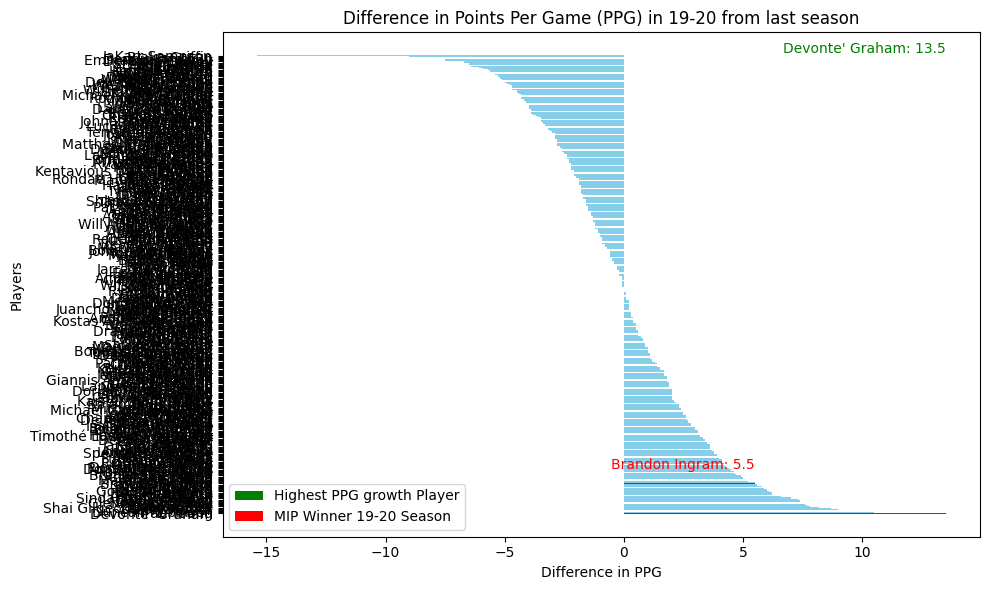

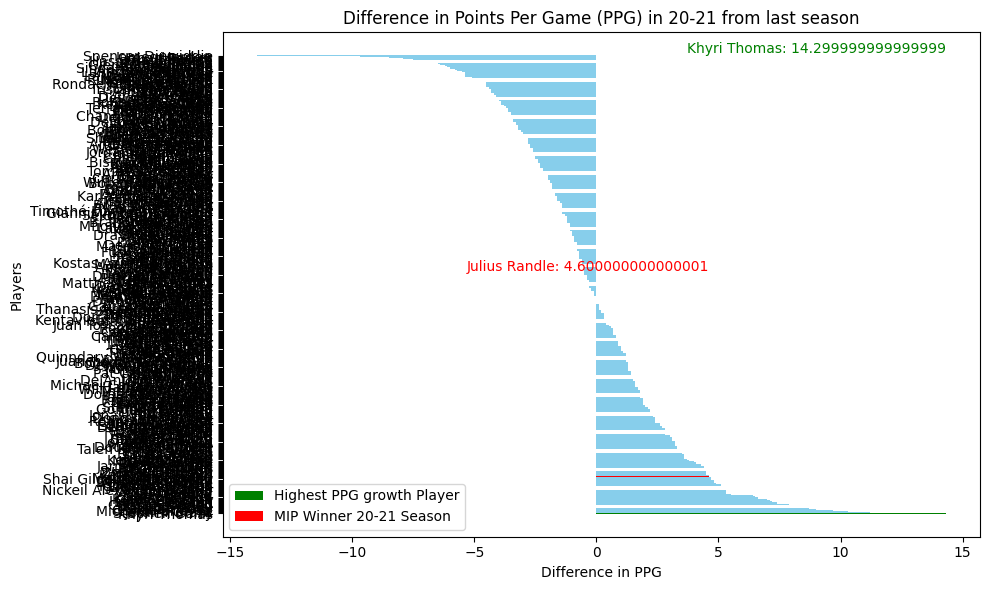

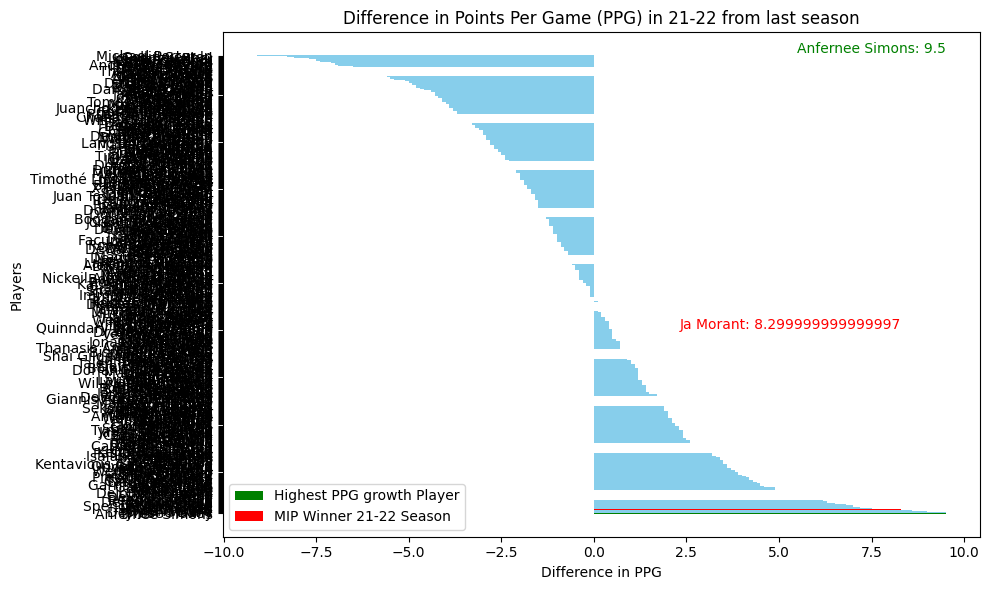

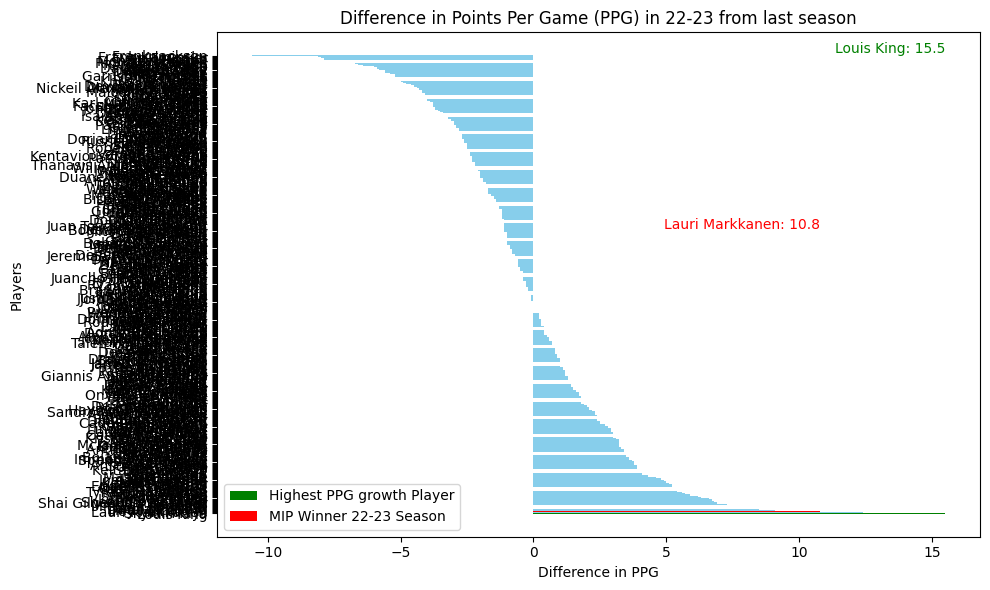

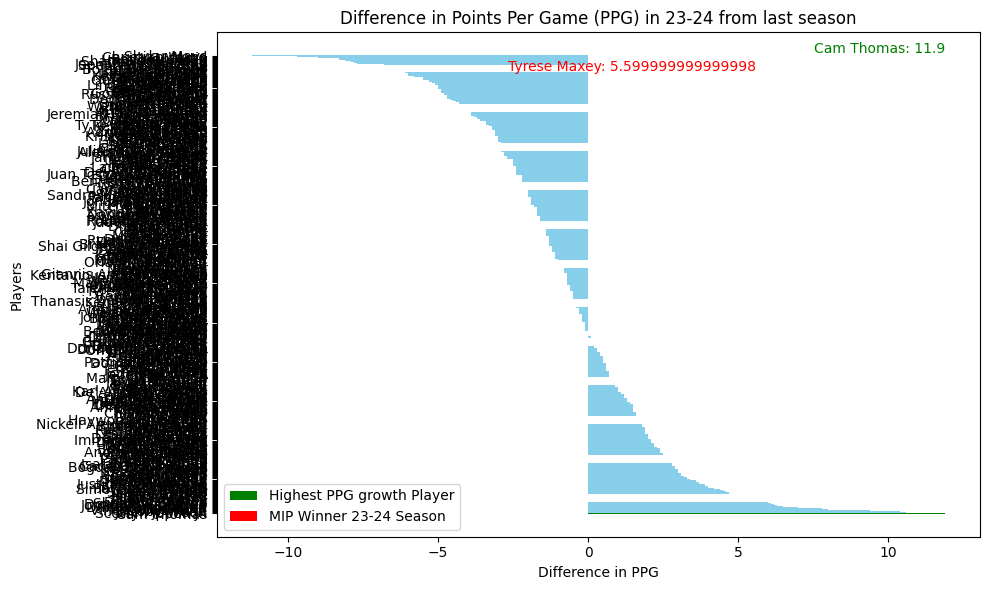

                           ppg  assists  offensive rebounds  fg percentage
Aaron Gordon              -1.6      0.0                 0.0         -0.012
Aaron Holiday              3.6      1.7                 0.2          0.013
Abdel Nader                2.3      0.4                 0.1          0.045
Al Horford                -1.7     -0.2                -0.3         -0.085
Al-Farouq Aminu           -5.1     -0.1                -0.1         -0.142
Alec Burks                 6.2      0.9                 0.2          0.013
Alex Caruso               -3.7     -1.2                -0.5         -0.033
Alex Len                  -3.1     -0.2                -0.3          0.061
Alfonzo McKinnie          -0.1      0.0                -0.2         -0.060
Alize Johnson              1.1      0.3                 0.6          0.164
Allen Crabbe              -5.0     -0.2                -0.1         -0.011
Allonzo Trier             -4.4     -0.7                -0.2          0.033
Amile Jefferson          

In [83]:
# Any player that cannot stay in the league will have NaN values and thus will be dropped from the table
# Store the points assists and rebounds in a data frame and remove null string rows from data frame to get difference in all active players
pureOffensive1819 = data1819[['ppg','assists','offensive rebounds','fg percentage']].replace('', np.nan) 
pureOffensive1920 = data1920[['ppg','assists','offensive rebounds','fg percentage']].replace('', np.nan)
pureOffensive2021 = data2021[['ppg','assists','offensive rebounds','fg percentage']].replace('', np.nan) 
pureOffensive2122 = data2122[['ppg','assists','offensive rebounds','fg percentage']].replace('', np.nan)
pureOffensive2223 = data2223[['ppg','assists','offensive rebounds','fg percentage']].replace('', np.nan) 
pureOffensive2324 = data2324[['ppg','assists','offensive rebounds','fg percentage']].replace('', np.nan)

# # Convert each of the stats to floats for arithmetics subtraction over seasons
pureOffensive1819 = pureOffensive1819.astype(float) # 1920 season
pureOffensive1920 = pureOffensive1920.astype(float)
pureOffensive2021 = pureOffensive2021.astype(float)
pureOffensive2122 = pureOffensive2122.astype(float)
pureOffensive2223 = pureOffensive2223.astype(float)
pureOffensive2324 = pureOffensive2324.astype(float)
# Subtracts from the 19/20 season data so growth and decline is noted in the data frame
pureOffensive1820 = pureOffensive1920.sub(pureOffensive1819)
pureOffensive1921 = pureOffensive2021.sub(pureOffensive1920)
pureOffensive2022 = pureOffensive2122.sub(pureOffensive2021)
pureOffensive2123 = pureOffensive2223.sub(pureOffensive2122)
pureOffensive2224 = pureOffensive2324.sub(pureOffensive2223)

# print(pureOffensive1820)
allOffense = [pureOffensive1820, pureOffensive1921, pureOffensive2022, pureOffensive2123, pureOffensive2224]
yc = 0
years = ["19-20", "20-21", "21-22", "22-23", "23-24"]

def get_ppg_diff(offense, mip, year):

    
    offense.dropna(inplace=True)

    # Sort the DataFrame by the difference in PPG
    sorted_growth_df = offense.sort_values(by='ppg', ascending=False)

    # Plotting the difference in PPG for all players
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_growth_df.index, sorted_growth_df['ppg'], color='skyblue')
    plt.title(f'Difference in Points Per Game (PPG) in {year} from last season')
    plt.xlabel('Difference in PPG')
    plt.ylabel('Players')

    # Highlighting the player with the highest difference
    highest_difference_player = sorted_growth_df.index[0]
    highest_difference = sorted_growth_df.loc[highest_difference_player, 'ppg']
    plt.barh(highest_difference_player, highest_difference, color='green', label='Highest PPG growth Player')

    # Annotating the highest difference
    plt.text(highest_difference, len(sorted_growth_df) - 1, f"{highest_difference_player}: {highest_difference}", va='bottom', ha= 'right', color= 'green')

    # Highlighting the award player
    if mip in offense.index:
        award_player_difference = offense.loc[mip, 'ppg']
        plt.barh(mip, award_player_difference, color='red', label=f'MIP Winner {year} Season')
        plt.text(award_player_difference, offense.index.get_loc(mip),f'{mip}: {award_player_difference}', va='bottom', ha= 'right', color = 'red')

    plt.legend(loc= 'lower left')
    plt.tight_layout()
    plt.show()

for offense in allOffense:
    mip = pastMipWinners[yc]
    get_ppg_diff(offense, mip, years[yc])
    yc+=1
print(pureOffensive1820)

Next, we are are going to create graphs that are going to analyze the growth or decline in offensive performance, specifically in terms of Assists Per Game (APG), across multiple basketball seasons, highlighting notable players and their improvements. We are going to do this by first cleaning the said data again due to the player needing to be the in the NBA for 2 seasons, then calulating the assist difference, then visualize the data by graphing it. Any player not in the NBA for 2 seasons will be dropped from said table. The player with the highest growth in Assists per game is highlighted in green and the most improved player is highlighted in red.

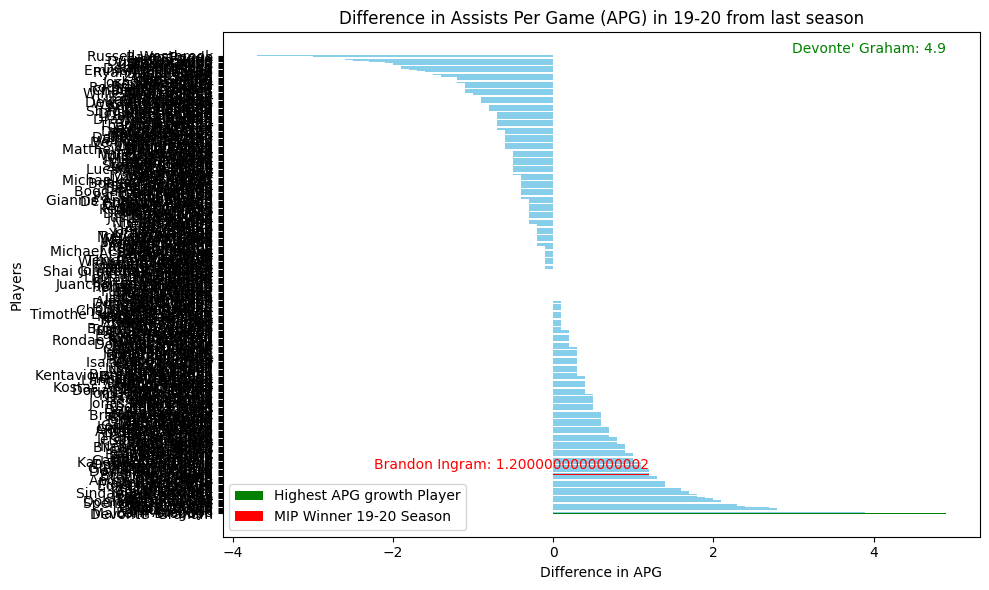

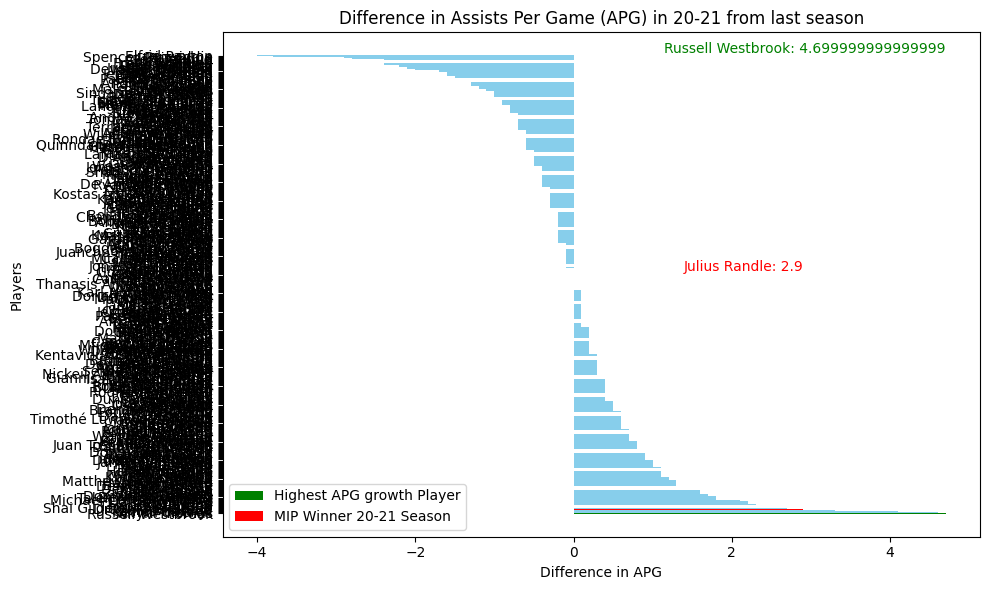

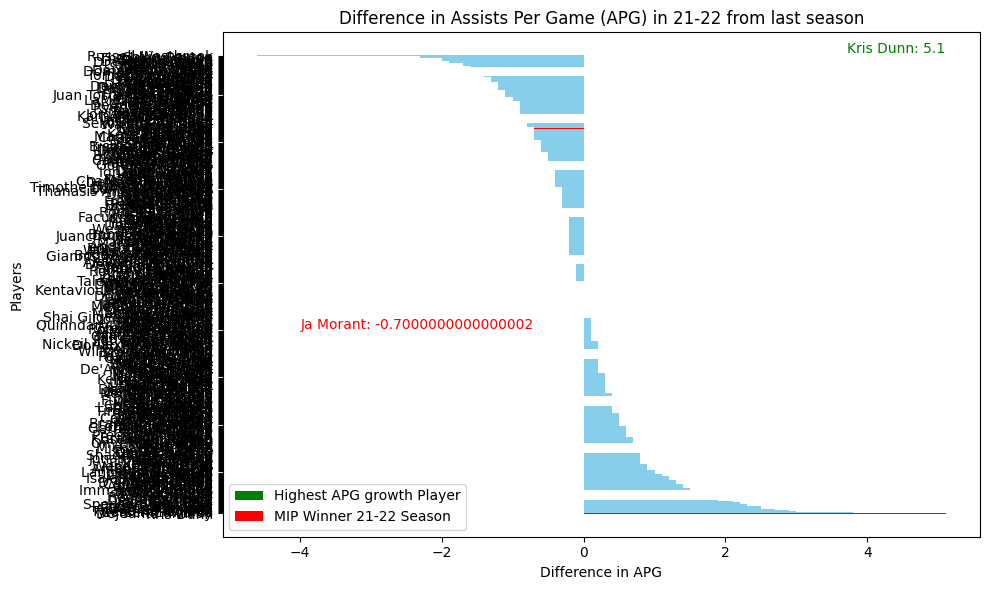

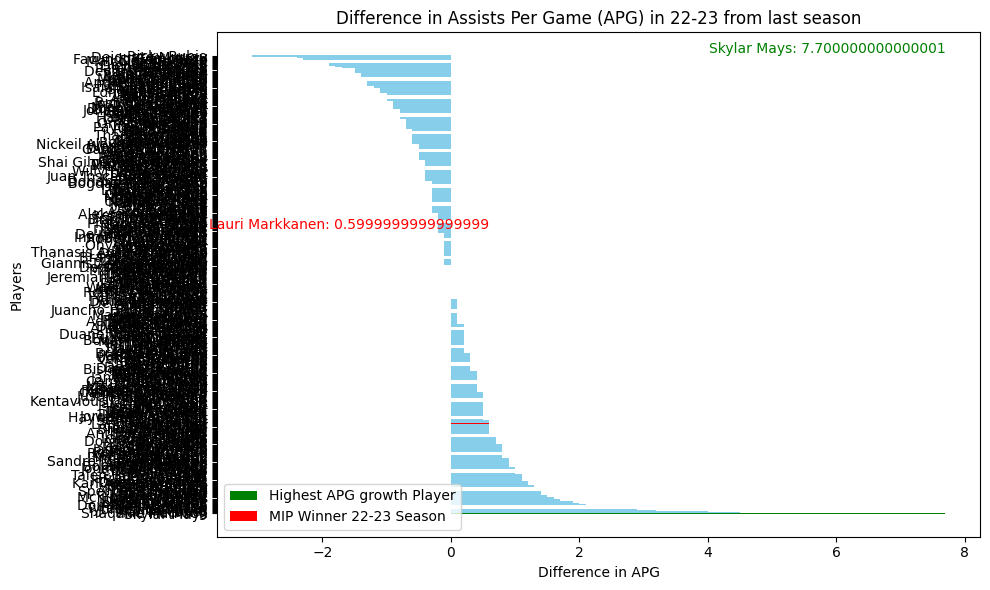

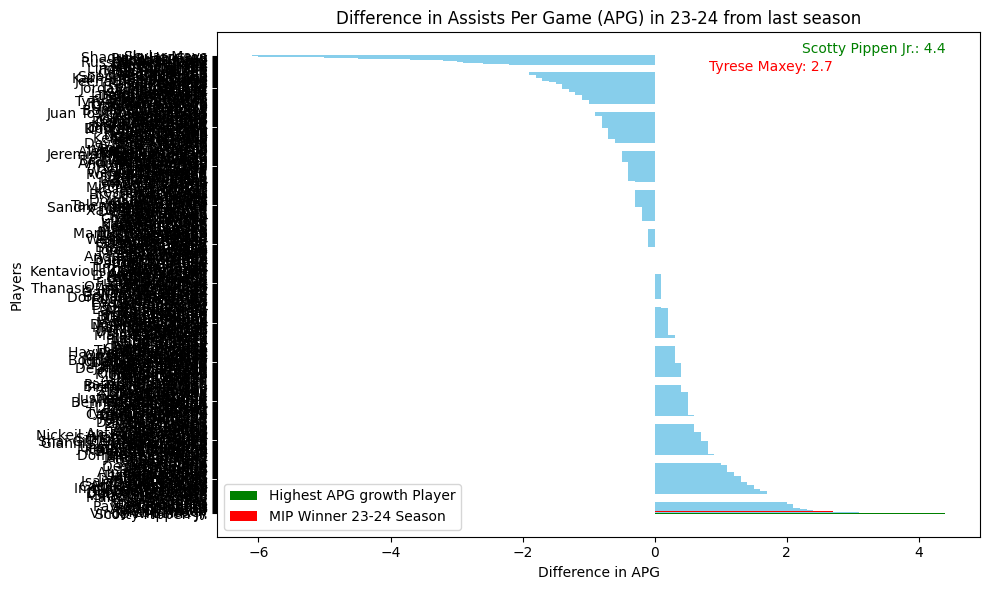

In [44]:
def get_assists_diff(offense, mip, year):

    offense.dropna(inplace=True)

    # Sort the DataFrame by the difference in PPG
    sorted_growth_df = offense.sort_values(by='assists', ascending=False)

    # Plotting the difference in PPG for all players
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_growth_df.index, sorted_growth_df['assists'], color='skyblue')
    plt.title(f'Difference in Assists Per Game (APG) in {year} from last season')
    plt.xlabel('Difference in APG')
    plt.ylabel('Players')

    # Highlighting the player with the highest difference
    highest_difference_player = sorted_growth_df.index[0]
    highest_difference = sorted_growth_df.loc[highest_difference_player, 'assists']
    plt.barh(highest_difference_player, highest_difference, color='green', label='Highest APG growth Player')

    # Annotating the highest difference
    plt.text(highest_difference, len(sorted_growth_df) - 1, f"{highest_difference_player}: {highest_difference}", va='bottom', ha= 'right', color= 'green')

    # Highlighting the award player
    if mip in offense.index:
        award_player_difference = offense.loc[mip, 'assists']
        plt.barh(mip, award_player_difference, color='red', label=f'MIP Winner {year} Season')
        plt.text(award_player_difference, offense.index.get_loc(mip),f'{mip}: {award_player_difference}', va='bottom', ha= 'right', color = 'red')


    plt.legend(loc= 'lower left')
    plt.tight_layout()
    plt.show()

oo =0

for offense in allOffense:
    mip = pastMipWinners[oo]
    get_assists_diff(offense, mip, years[oo])
    oo+=1

Next, we are are going to create graphs that are going to analyze the growth or decline in offensive performance, specifically in terms of offensive rebounds per game (OR), across multiple basketball seasons, highlighting notable players and their improvements. We are going to do this by first cleaning the said data again due to the player needing to be the in the NBA for 2 seasons, then calulating the difference, then visualize the data by graphing it. Any player not in the NBA for 2 seasons will be dropped from said table. The player with the highest growth in offensive rebounds per game is highlighted in green and the most improved player is highlighted in red.

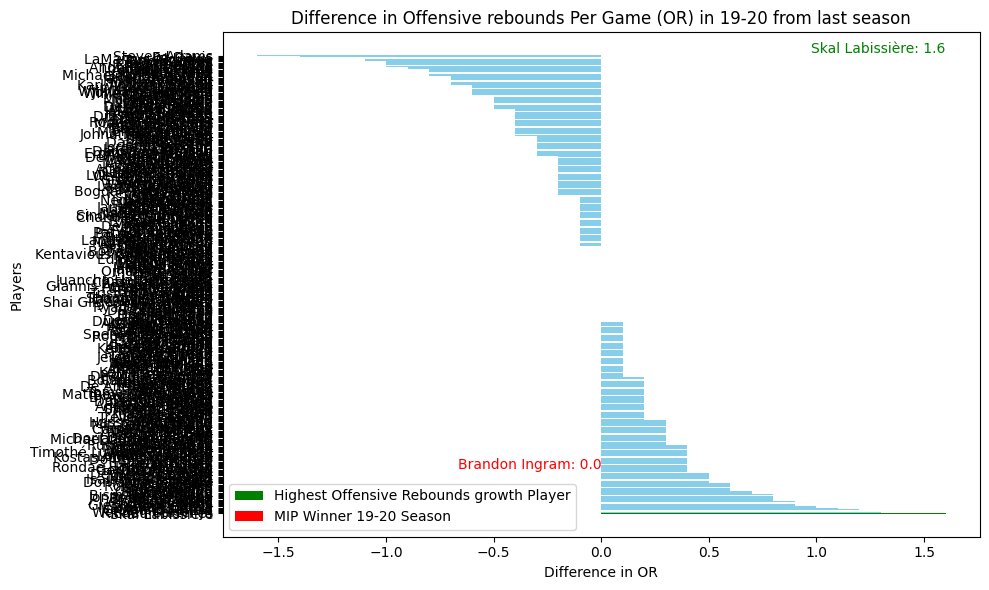

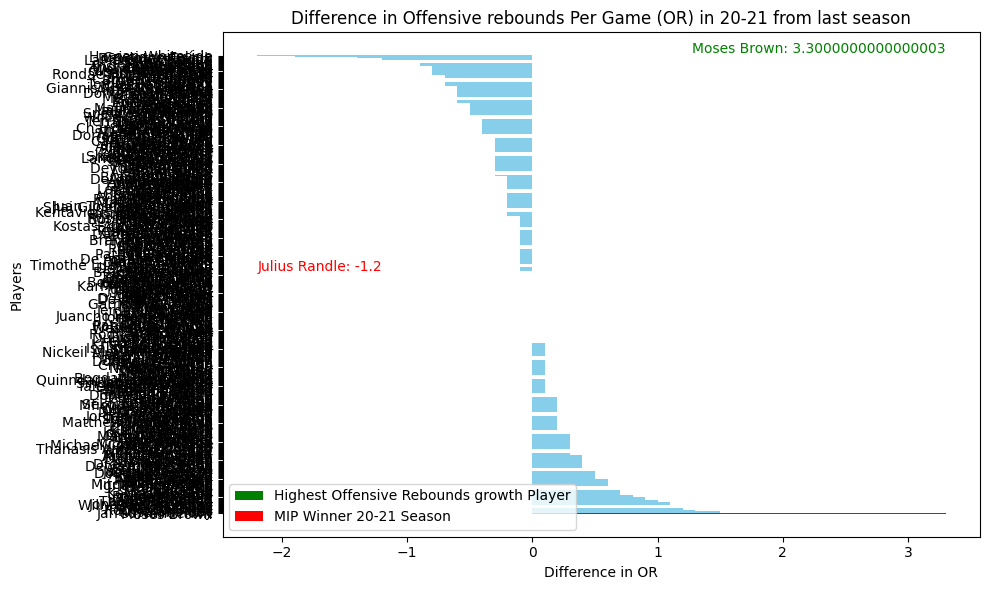

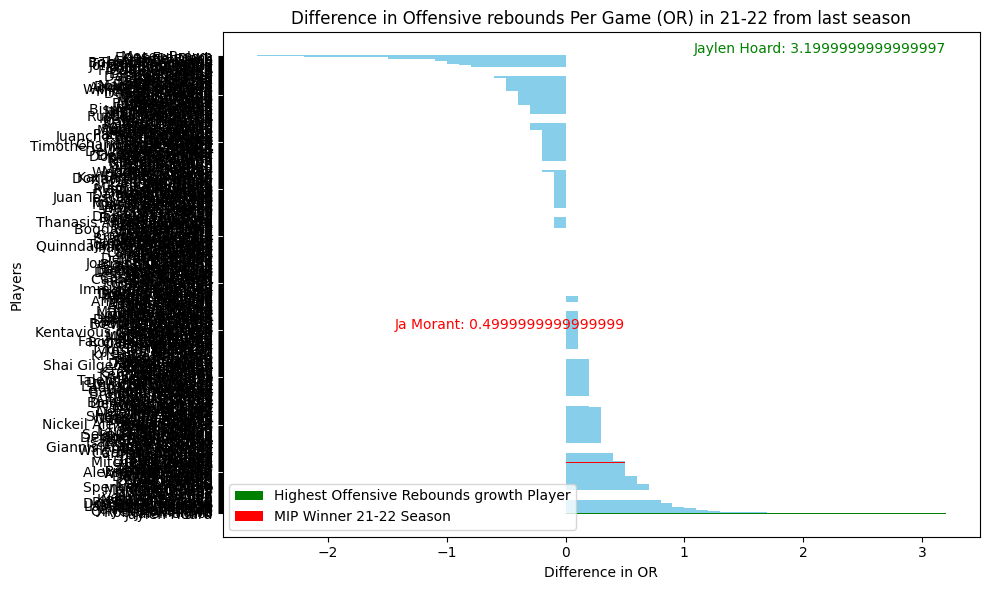

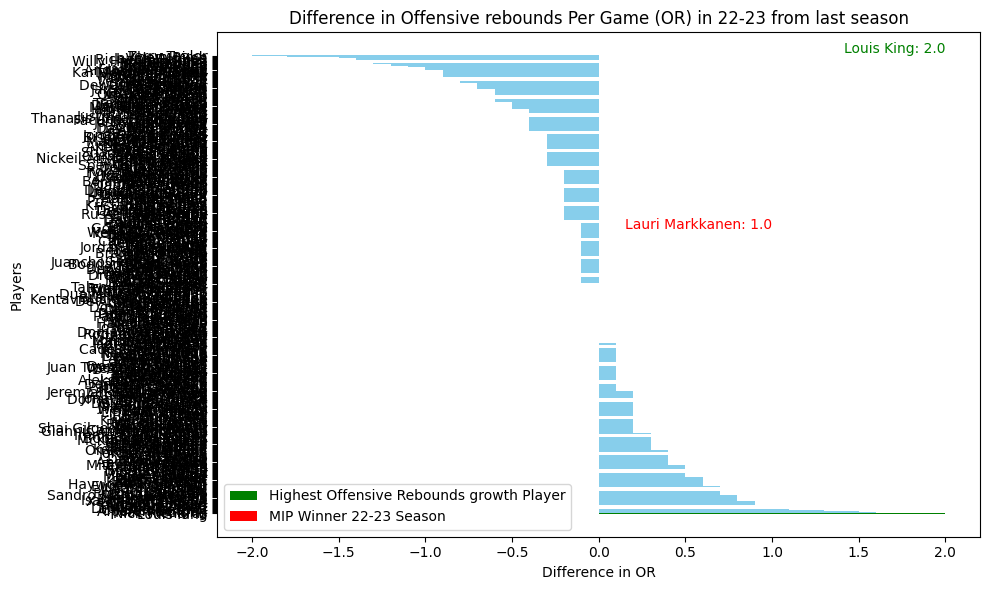

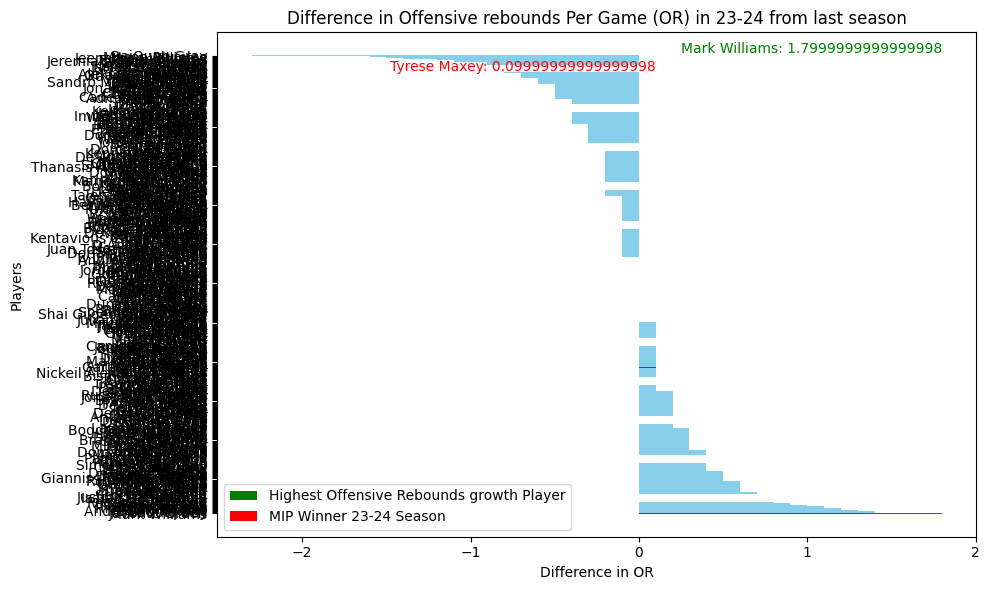

In [43]:
def get_or_diff(offense, mip, year):

    offense.dropna(inplace=True)

    # Sort the DataFrame by the difference in PPG
    sorted_growth_df = offense.sort_values(by='offensive rebounds', ascending=False)

    # Plotting the difference in PPG for all players
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_growth_df.index, sorted_growth_df['offensive rebounds'], color='skyblue')
    plt.title(f'Difference in Offensive rebounds Per Game (OR) in {year} from last season')
    plt.xlabel('Difference in OR')
    plt.ylabel('Players')

    # Highlighting the player with the highest difference
    highest_difference_player = sorted_growth_df.index[0]
    highest_difference = sorted_growth_df.loc[highest_difference_player, 'offensive rebounds']
    plt.barh(highest_difference_player, highest_difference, color='green', label='Highest Offensive Rebounds growth Player')

    # Annotating the highest difference
    plt.text(highest_difference, len(sorted_growth_df) - 1, f"{highest_difference_player}: {highest_difference}", va='bottom', ha= 'right', color= 'green')

    # Highlighting the award player
    if mip in offense.index:
        award_player_difference = offense.loc[mip, 'offensive rebounds']
        plt.barh(mip, award_player_difference, color='red', label=f'MIP Winner {year} Season')
        plt.text(award_player_difference, offense.index.get_loc(mip),f'{mip}: {award_player_difference}', va='bottom', ha= 'right', color = 'red')

    plt.legend(loc= 'lower left')
    plt.tight_layout()
    plt.show()

yc =0
for offense in allOffense:
    mip = pastMipWinners[yc]
    get_or_diff(offense, mip, years[yc])
    yc+=1

Next, we are are going to create graphs that are going to analyze the growth or decline in offensive performance, specifically in terms of field goal percentage (FGP), across multiple basketball seasons, highlighting notable players and their improvements. We are going to do this by first cleaning the said data again due to the player needing to be the in the NBA for 2 seasons, then calulating their field goal percentage, then visualize the data by graphing it. Any player not in the NBA for 2 seasons will be dropped from said table. The player with the highest growth in field goal percentage is highlighted in green and the most improved player is highlighted in red.

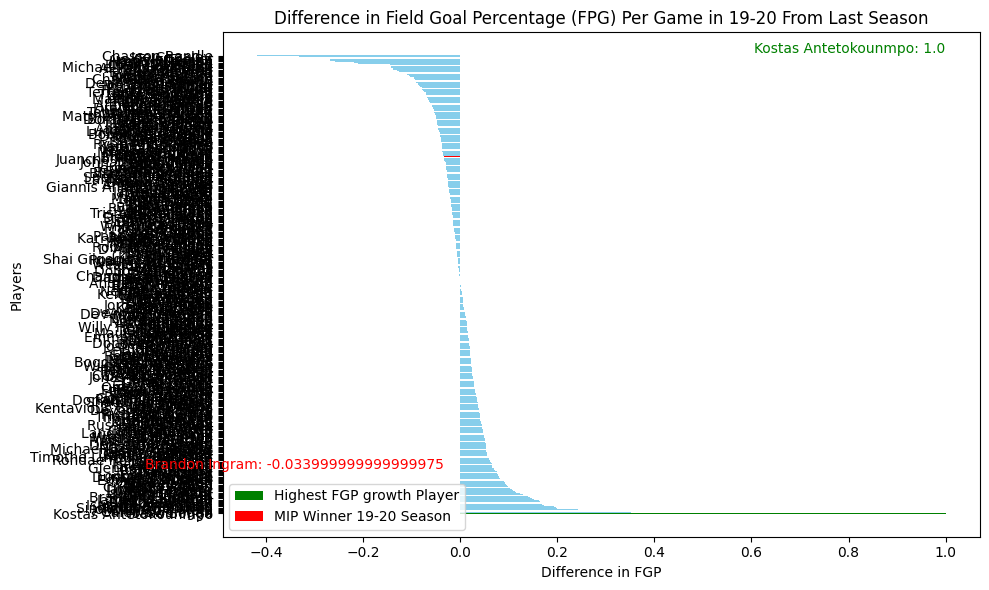

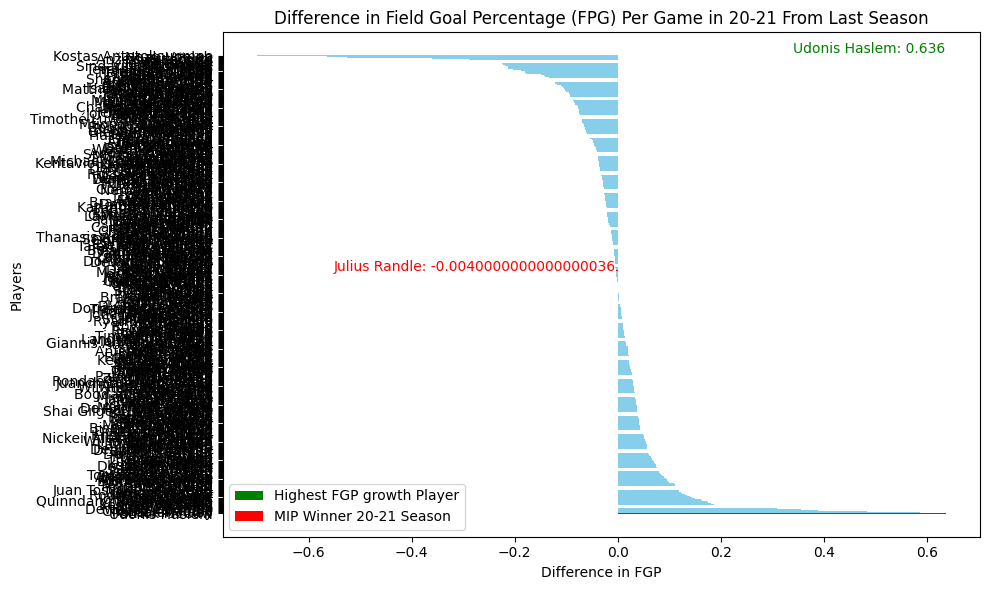

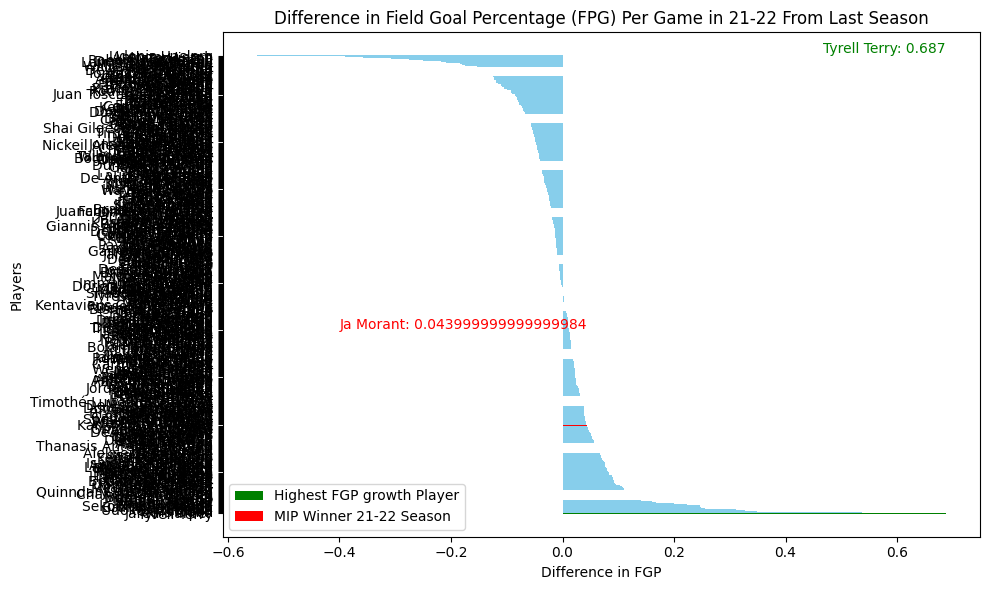

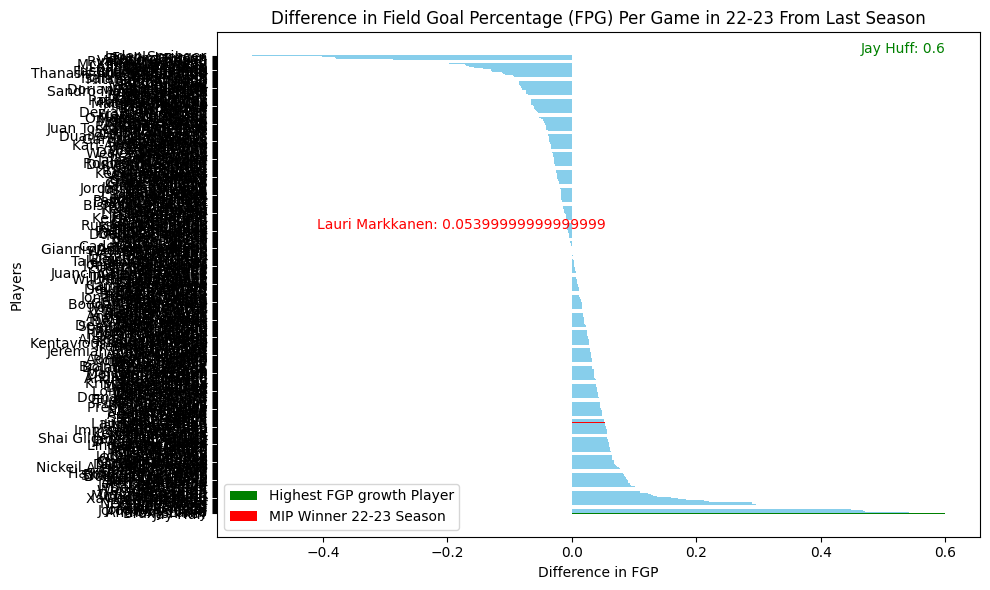

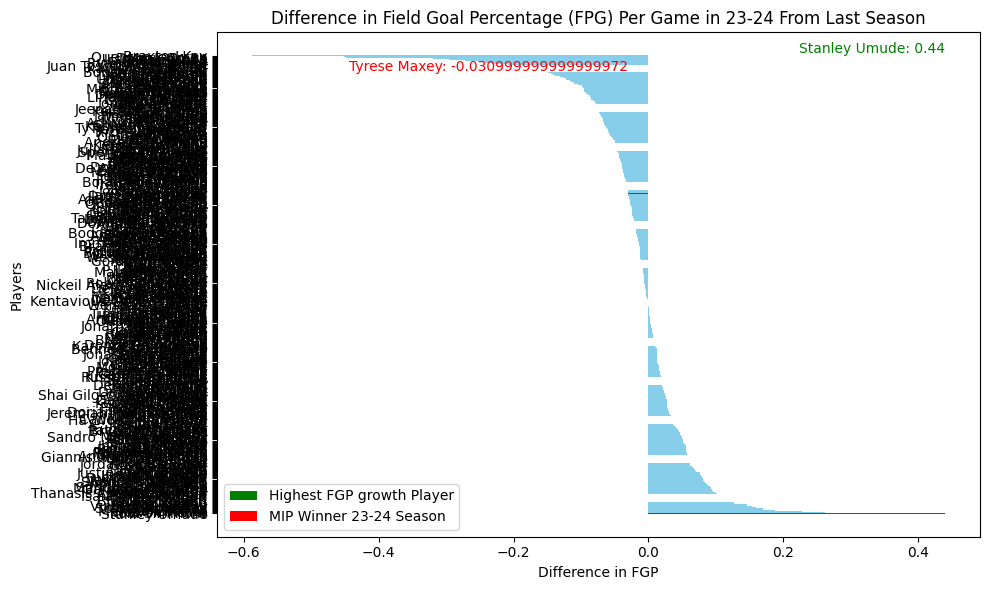

In [42]:
def get_fgp_diff(offense, mip, year):

    
    offense.dropna(inplace=True)

    # Sort the DataFrame by the difference in PPG
    sorted_growth_df = offense.sort_values(by='fg percentage', ascending=False)

    # Plotting the difference in PPG for all players
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_growth_df.index, sorted_growth_df['fg percentage'], color='skyblue')
    plt.title(f'Difference in Field Goal Percentage (FPG) Per Game in {year} From Last Season')
    plt.xlabel('Difference in FGP')
    plt.ylabel('Players')

    # Highlighting the player with the highest difference
    highest_difference_player = sorted_growth_df.index[0]
    highest_difference = sorted_growth_df.loc[highest_difference_player, 'fg percentage']
    plt.barh(highest_difference_player, highest_difference, color='green', label='Highest FGP growth Player')

    # Annotating the highest difference
    plt.text(highest_difference, len(sorted_growth_df) - 1, f"{highest_difference_player}: {highest_difference}", va='bottom', ha= 'right', color= 'green')

    # Highlighting the award player
    if mip in offense.index:
        award_player_difference = offense.loc[mip, 'fg percentage']
        plt.barh(mip, award_player_difference, color='red', label=f'MIP Winner {year} Season')
        plt.text(award_player_difference, offense.index.get_loc(mip),f'{mip}: {award_player_difference}', va='bottom', ha= 'right', color = 'red')


    plt.legend(loc= 'lower left')
    plt.tight_layout()
    plt.show()

yc =0
for offense in allOffense:
    mip = pastMipWinners[yc]
    get_fgp_diff(offense, mip, years[yc])
    yc+=1

This next section will conduct a regression analysis on the player rankings and their statistics for the year. We are going to analyze the relationship between offensive player statistics and player rankings across different basketball seasons, specifically focusing on predicting player rankings based on their offensive performance and evaluating the accuracy of these predictions. We are using the offensive rankings and stats that we have used/found above including points per game, assists per game, offensive rebounds per game, and field goal percentage.

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     11.78
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.215
Time:                        16:30:55   Log-Likelihood:                -4.1250
No. Observations:                   6   AIC:                             18.25
Df Residuals:                       1   BIC:                             17.21
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 20.1963      3

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


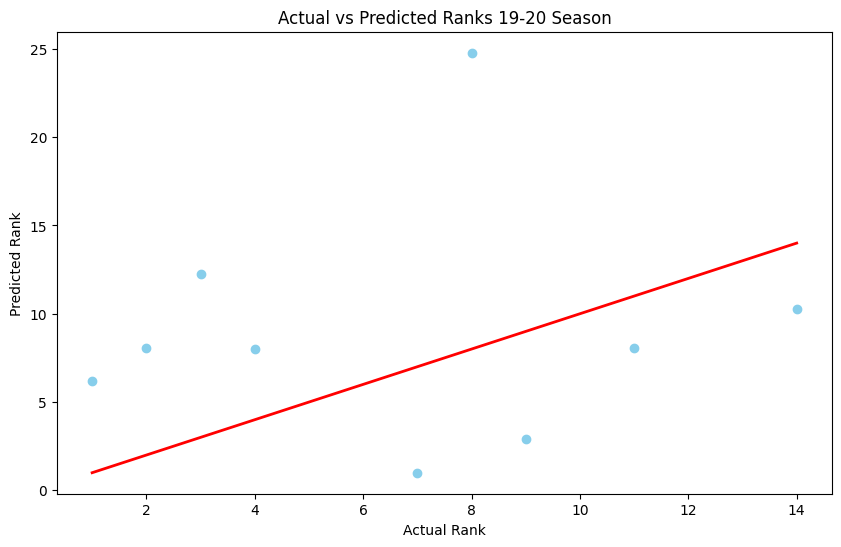

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2.200
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.205
Time:                        16:30:55   Log-Likelihood:                -28.556
No. Observations:                  10   AIC:                             67.11
Df Residuals:                       5   BIC:                             68.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 19.9431      5

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


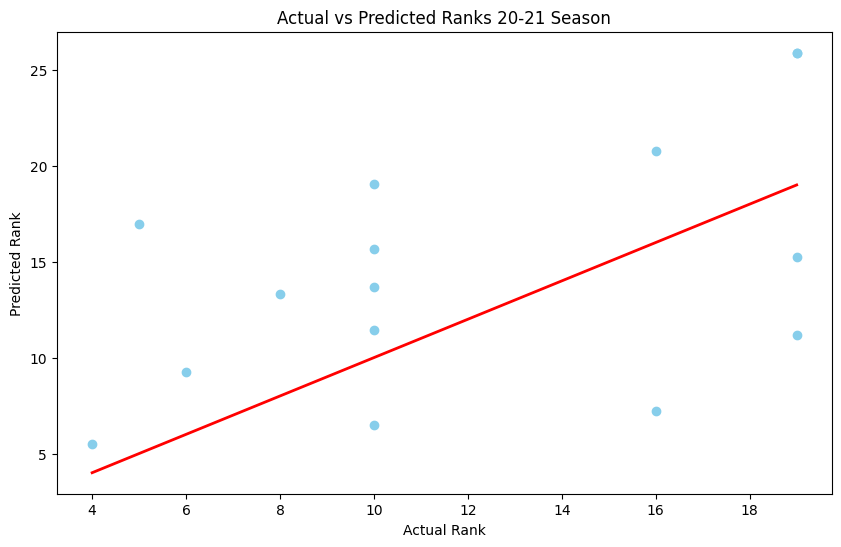

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 May 2024   Prob (F-statistic):                nan
Time:                        16:30:55   Log-Likelihood:                 120.86
No. Observations:                   4   AIC:                            -233.7
Df Residuals:                       0   BIC:                            -236.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.4852       

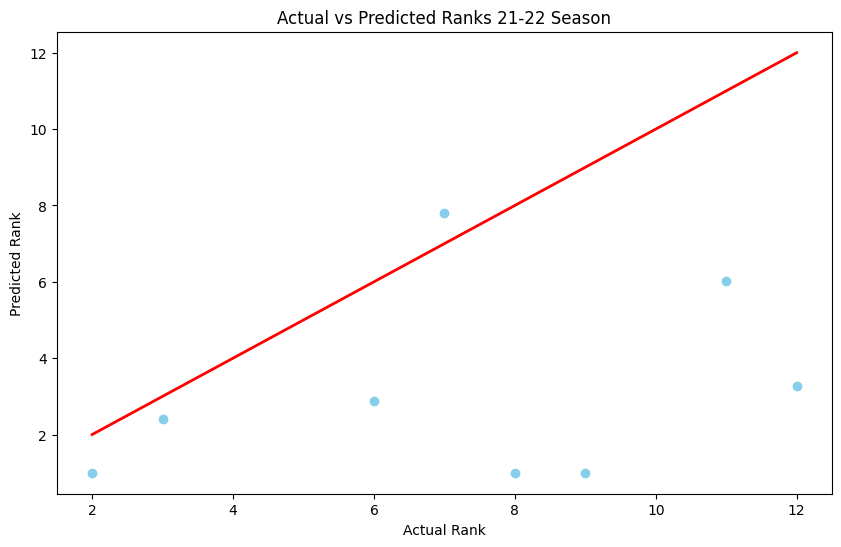

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 May 2024   Prob (F-statistic):                nan
Time:                        16:30:55   Log-Likelihood:                 158.82
No. Observations:                   5   AIC:                            -307.6
Df Residuals:                       0   BIC:                            -309.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.7721       

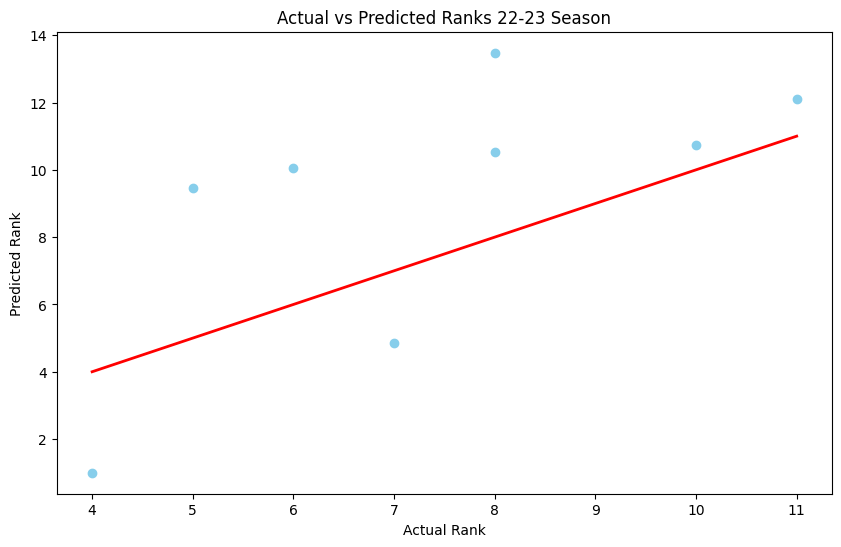

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 May 2024   Prob (F-statistic):                nan
Time:                        16:30:55   Log-Likelihood:                 160.01
No. Observations:                   5   AIC:                            -310.0
Df Residuals:                       0   BIC:                            -312.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.9733       

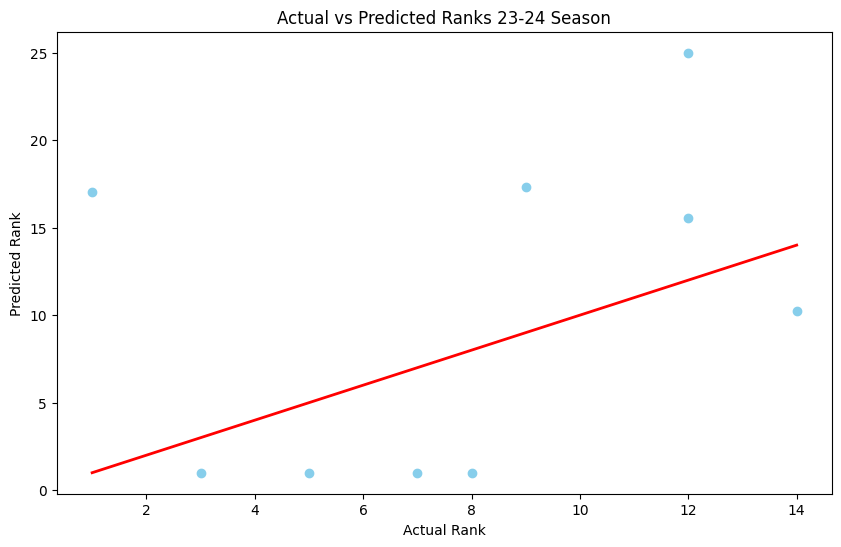

In [87]:
# this obtains the coefficients would show the probability of the correlation between the actual and predicted rank based on difference of each statistic
def regression2(pureOffensive, mipdata,year):
    pureOffensive = pd.merge(pureOffensive, mipdata, left_index=True, right_index=True)
    pureOffensive['Rank'] = pureOffensive['Rank'].astype(int)
    X = pureOffensive[['ppg', 'assists', 'offensive rebounds', 'fg percentage']]
    y = pureOffensive['Rank']
    X = sm.add_constant(X)
    
    X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.6, random_state=42)
    
    # Train the model
    model1 = sm.OLS(y1_train, X1_train).fit()
    print(model1.summary())

    # Make predictions
    y1_pred = model1.predict(X1_test)
    y1_pred = np.maximum(y1_pred,1)

    # Calculate evaluation metrics
    mse1 = mean_squared_error(y1_test, y1_pred)
    r21 = r2_score(y1_test, y1_pred)
    print(f'Mean Squared Error: {mse1}')
    print(f'R-squared: {r21}')

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y1_test, y1_pred, color='skyblue')
    plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linewidth=2)
    plt.title(f'Actual vs Predicted Ranks {year} Season')
    plt.xlabel('Actual Rank')
    plt.ylabel('Predicted Rank')
    plt.show()
    
listMip = [mipdata1920,mipdata2021,mipdata2122,mipdata2223,mipdata2324]
for i,j in enumerate(allOffense):
    regression2(j, listMip[i], years[i])

While analyzing the regressions of the the offensive stats it is important to note that due to small sample size within a given season with varying ranks and numbers of players on that years Most Improved Player ladder, regression may not have an ample amount of samples to do an effective regression model. For the 19/20 Most Improved player table, it indicated a p-value of 0.215 meaning that the model was not statistically significant.  While offensive rebounds was the only parameter with a positive coefficient suggesting it would indicate a higher rank, all of the parameters were statistically insignificant. For the 20/21 season, the points per game negative correlation with rank was nearly statistically significant with a p-value of 0.070 as 0.05 or below is needed for signicance.

Here, we are trying to  to visualize the correlations between various offensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2019-2020 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

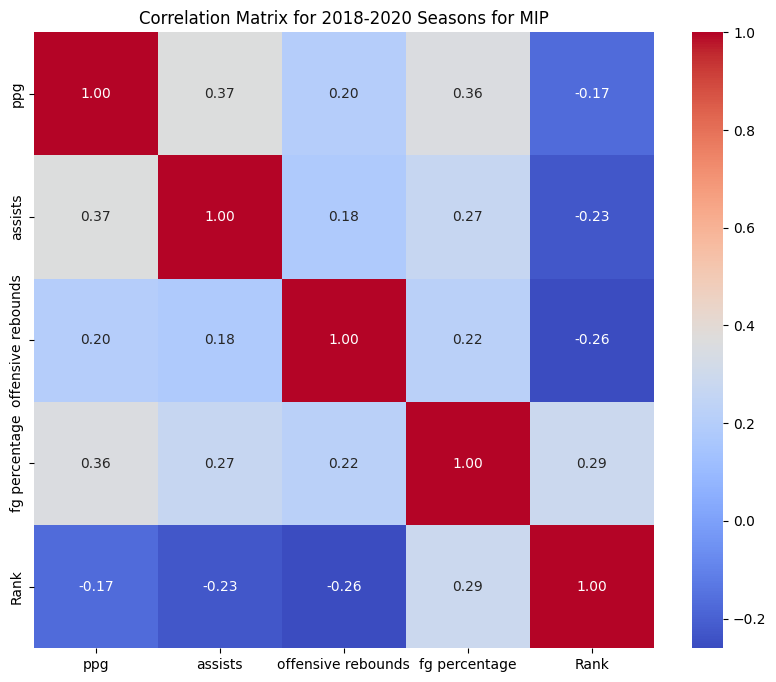

In [381]:
def corrMOffensive1820(pureOffensive1820,mipdata1920):
    pureOffensive1820 = pd.merge(pureOffensive1820, mipdata1920, left_index=True, right_index=True)

    correlation_matrix = pureOffensive1820.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2018-2020 Seasons for MIP')
    plt.show()
corrMOffensive1820(pureOffensive1820,mipdata1920)

# direct positive correlations are redder and negative correlations are bluer 

Here, we are trying to  to visualize the correlations between various offensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2020-2021 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

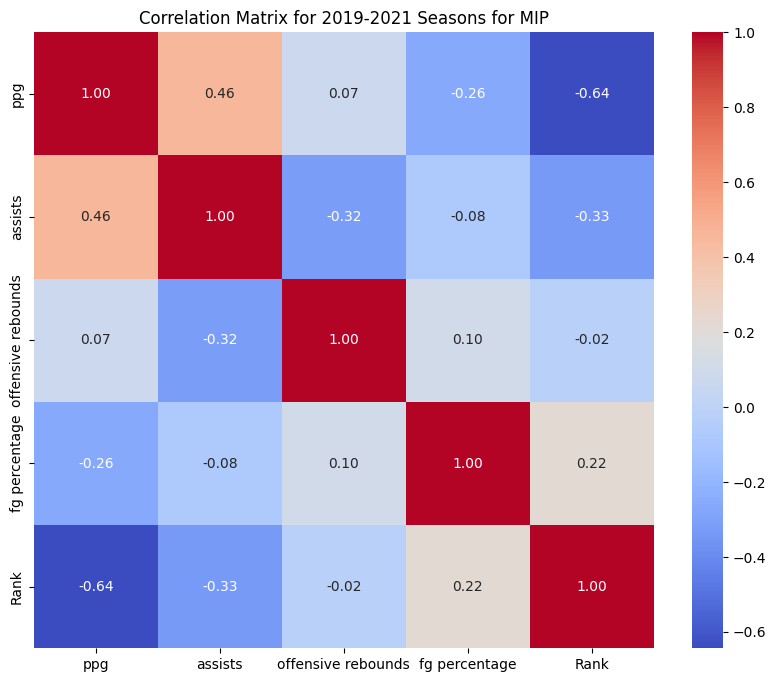

In [383]:
def corrMOffensive1921(pureOffensive1921,mipdata2021):   
    pureOffensive1921 = pd.merge(pureOffensive1921, mipdata2021, left_index=True, right_index=True)
    correlation_matrix1 = pureOffensive1921.corr()
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2019-2021 Seasons for MIP')
    plt.show()
corrMOffensive1921(pureOffensive1921,mipdata2021)


Here, we are trying to  to visualize the correlations between various offensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2021-2022 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

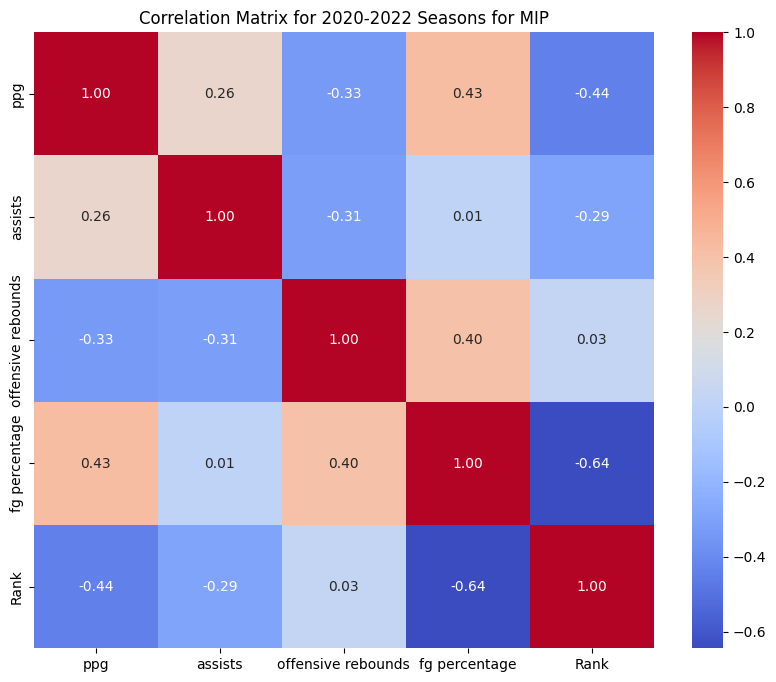

In [386]:
def corrMOffensive2022(pureOffensive2022,mipdata2122):   
    pureOffensive2022 = pd.merge(pureOffensive2022, mipdata2122, left_index=True, right_index=True)
    correlation_matrix2 = pureOffensive2022.corr()
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2020-2022 Seasons for MIP')
    plt.show()
corrMOffensive2022(pureOffensive2022,mipdata2122)


Here, we are trying to  to visualize the correlations between various offensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2022-2023 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

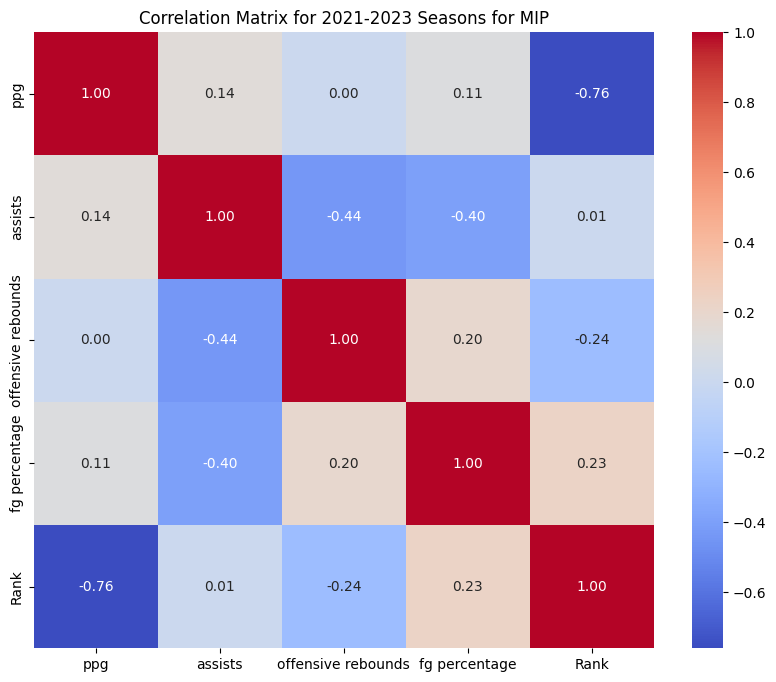

In [387]:
def corrMOffensive2123(pureOffensive2123,mipdata2223):   

    pureOffensive2123 = pd.merge(pureOffensive2123, mipdata2223, left_index=True, right_index=True)

    correlation_matrix3 = pureOffensive2123.corr()
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2021-2023 Seasons for MIP')
    plt.show()
corrMOffensive2123(pureOffensive2123,mipdata2223)  


Here, we are trying to  to visualize the correlations between various offensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2023-2024 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

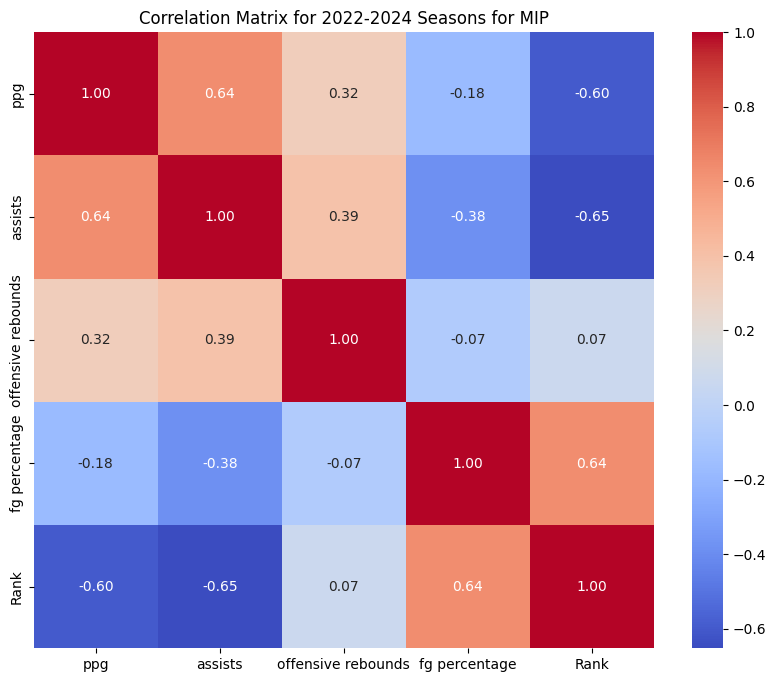

In [389]:
def corrMOffensive2224(pureOffensive2224,mipdata2324):   

    pureOffensive2224 = pd.merge(pureOffensive2224, mipdata2324, left_index=True, right_index=True)
    correlation_matrix4 = pureOffensive2224.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2022-2024 Seasons for MIP')
    plt.show()
corrMOffensive2224(pureOffensive2224,mipdata2324)   


Defensive stats

Next, we are are going to create graphs that are going to analyze the growth or decline in defensive performance, specifically in terms of Blocks Per Game (BPG), across multiple basketball seasons, highlighting notable players and their improvements. We are going to do this by first cleaning the said data again due to the player needing to be the in the NBA for 2 seasons, then calulating the difference in blocks, then visualize the data by graphing it. Any player not in the NBA for 2 seasons will be dropped from said table. The player with the highest growth in blocks per game is highlighted in green and the most improved player is highlighted in red.

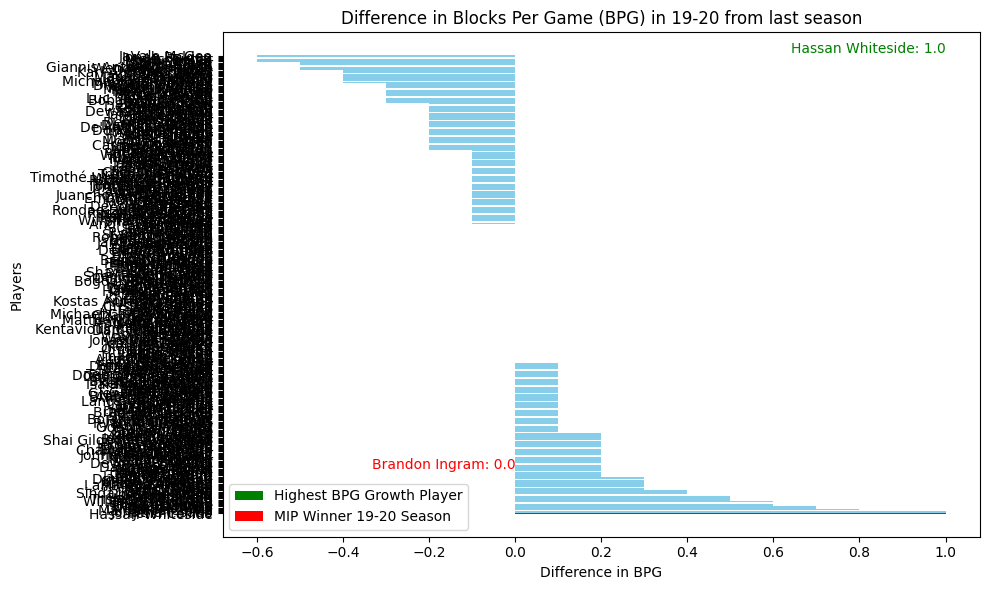

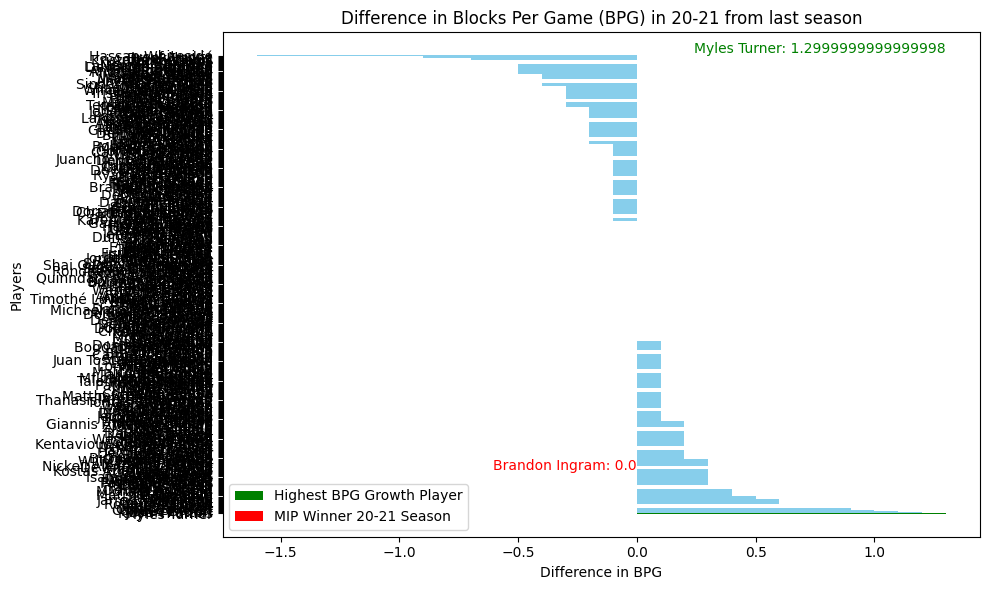

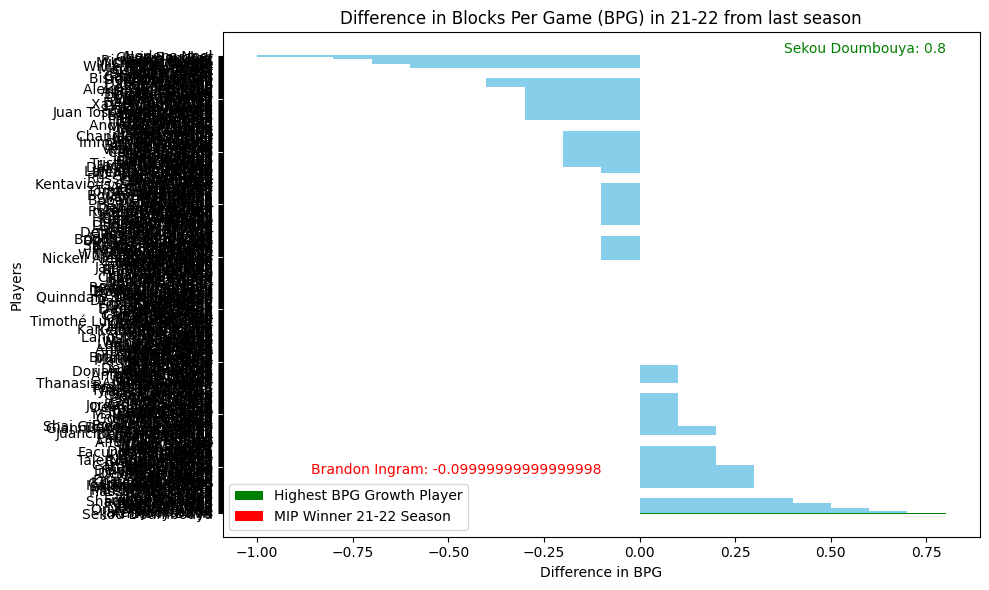

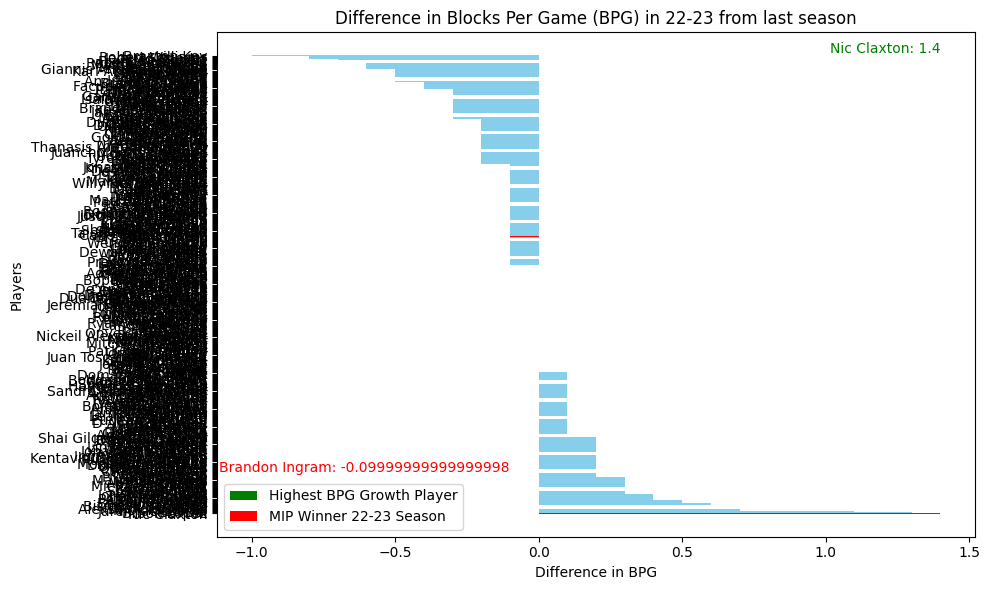

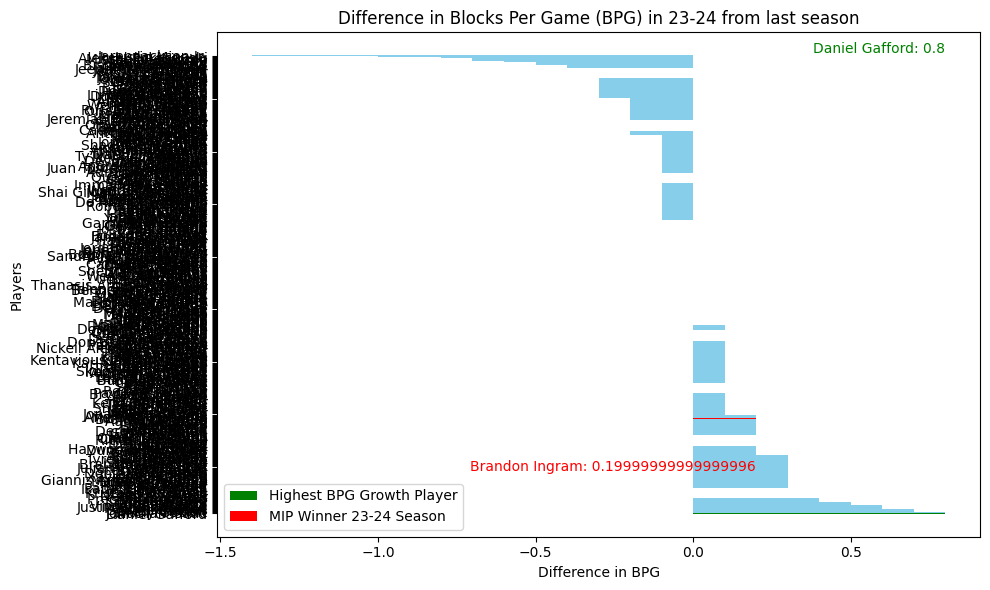

In [90]:
# Store the blocks, steals and defensive rebounds in a data frame and remove null string rows from data frame to get difference in all active players
pureDefensive1819 = data1819[['blocks','steals','defensive rebounds']].replace('', np.nan) 
pureDefensive1920 = data1920[['blocks','steals','defensive rebounds']].replace('', np.nan)
pureDefensive2021 = data2021[['blocks','steals','defensive rebounds']].replace('', np.nan) 
pureDefensive2122 = data2122[['blocks','steals','defensive rebounds']].replace('', np.nan)
pureDefensive2223 = data2223[['blocks','steals','defensive rebounds']].replace('', np.nan) 
pureDefensive2324 = data2324[['blocks','steals','defensive rebounds']].replace('', np.nan)

# # Convert each of the stats to floats for arithmetics subtraction over seasons
pureDefensive1819 = pureDefensive1819.astype(float) # 1920 season
pureDefensive1920 = pureDefensive1920.astype(float)
pureDefensive2021 = pureDefensive2021.astype(float)
pureDefensive2122 = pureDefensive2122.astype(float)
pureDefensive2223 = pureDefensive2223.astype(float)
pureDefensive2324 = pureDefensive2324.astype(float)
# Subtracts from the 19/20 season data so growth and decline is noted in the data frame
pureDefensive1820 = pureDefensive1920.sub(pureDefensive1819)
pureDefensive1921 = pureDefensive2021.sub(pureDefensive1920)
pureDefensive2022 = pureDefensive2122.sub(pureDefensive2021)
pureDefensive2123 = pureDefensive2223.sub(pureDefensive2122)
pureDefensive2224 = pureDefensive2324.sub(pureDefensive2223)

allDefense = [pureDefensive1820, pureDefensive1921, pureDefensive2022, pureDefensive2123, pureDefensive2224]
yc = 0
years = ["19-20", "20-21", "21-22", "22-23", "23-24"]

def get_blocks_diff(defense, mip, year):

    
    defense.dropna(inplace=True)

    # Sort the DataFrame by the difference in PPG
    sorted_growth_df = defense.sort_values(by='blocks', ascending=False)

    # Plotting the difference in PPG for all players
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_growth_df.index, sorted_growth_df['blocks'], color='skyblue')
    plt.title(f'Difference in Blocks Per Game (BPG) in {year} from last season')
    plt.xlabel('Difference in BPG')
    plt.ylabel('Players')

    # Highlighting the player with the highest difference
    highest_difference_player = sorted_growth_df.index[0]
    highest_difference = sorted_growth_df.loc[highest_difference_player, 'blocks']
    plt.barh(highest_difference_player, highest_difference, color='green', label='Highest BPG Growth Player')

    # Annotating the highest difference
    plt.text(highest_difference, len(sorted_growth_df) - 1, f"{highest_difference_player}: {highest_difference}", va='bottom', ha= 'right', color= 'green')

    # Highlighting the award player
    if mip in defense.index:
        award_player_difference = defense.loc[mip, 'blocks']
        plt.barh(mip, award_player_difference, color='red', label=f'MIP Winner {year} Season')
        # plt.text(award_player_difference, offense.index.get_loc(mip, f'{mip}: {award_player_difference}'), va='center')
        plt.text(award_player_difference, defense.index.get_loc(mip),f'{mip}: {award_player_difference}', va='bottom', ha= 'right', color = 'red')


    plt.legend(loc= 'lower left')
    plt.tight_layout()
    plt.show()

count = 0
for defense in allDefense:
    mip = pastMipWinners[yc]
    get_blocks_diff(defense, mip, years[count])
    count+=1
# print(pureOffensive1820)

Next, we are are going to create graphs that are going to analyze the growth or decline in defensive performance, specifically in terms of Steals Per Game (SPG), across multiple basketball seasons, highlighting notable players and their improvements. We are going to do this by first cleaning the said data again due to the player needing to be the in the NBA for 2 seasons, then calulating the difference in steals, then visualize the data by graphing it. Any player not in the NBA for 2 seasons will be dropped from said table. The player with the highest growth in steals per game is highlighted in green and the most improved player is highlighted in red.

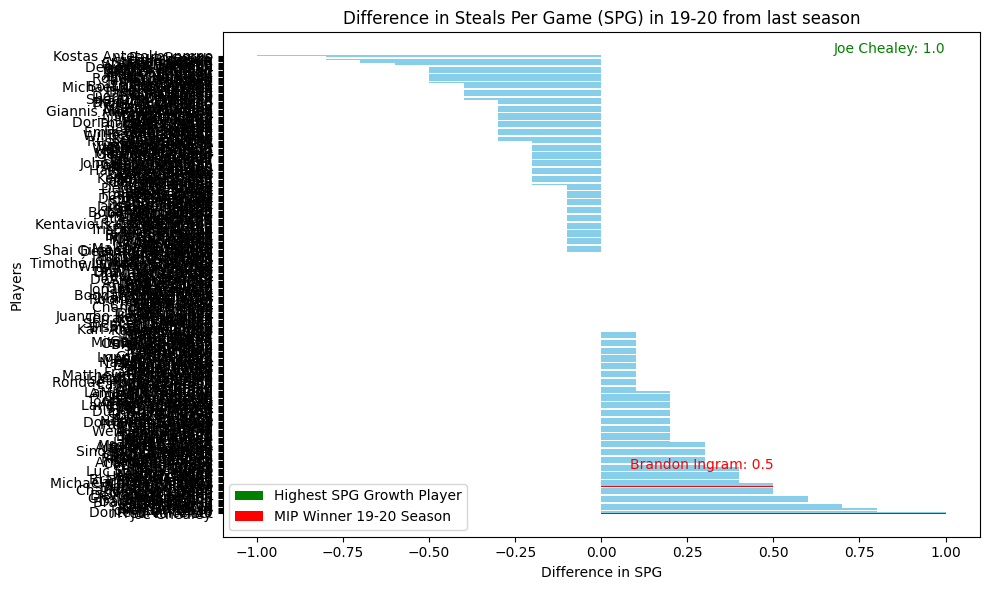

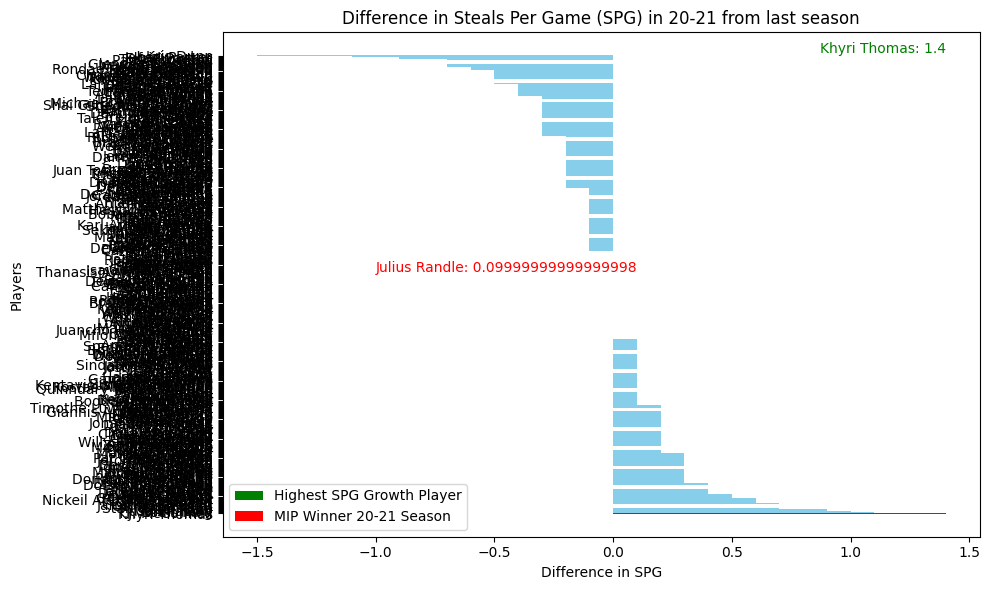

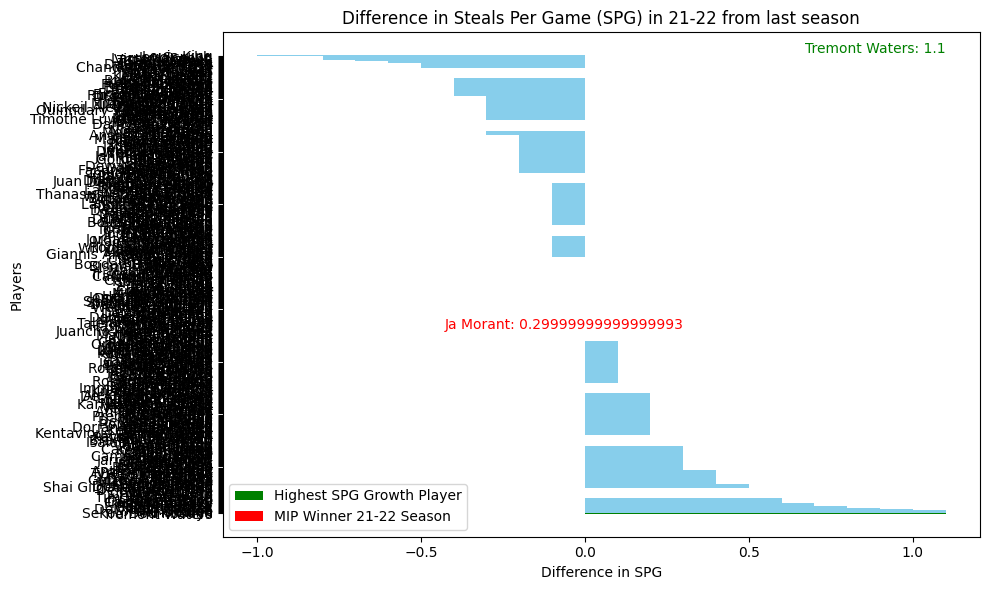

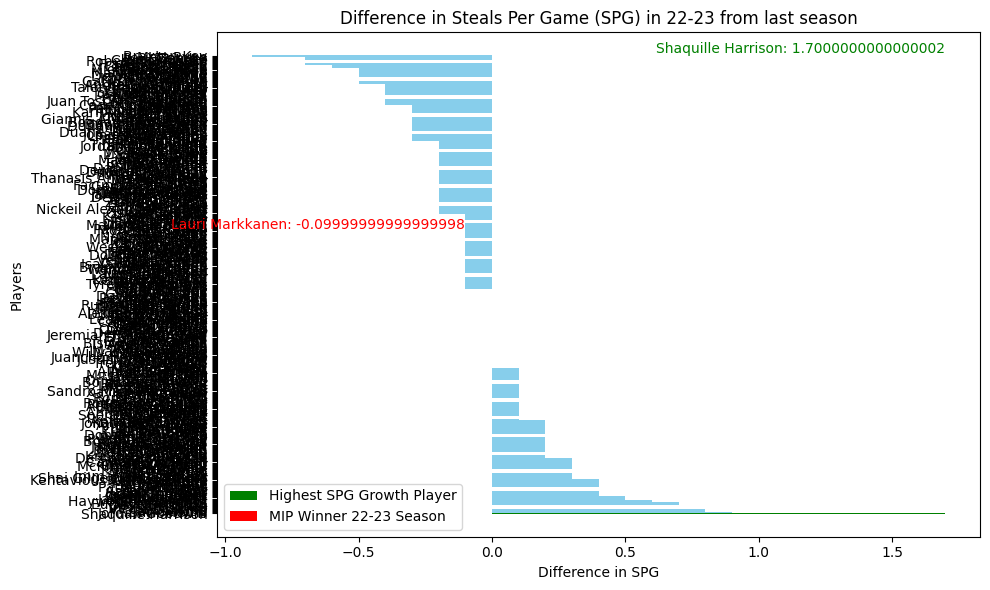

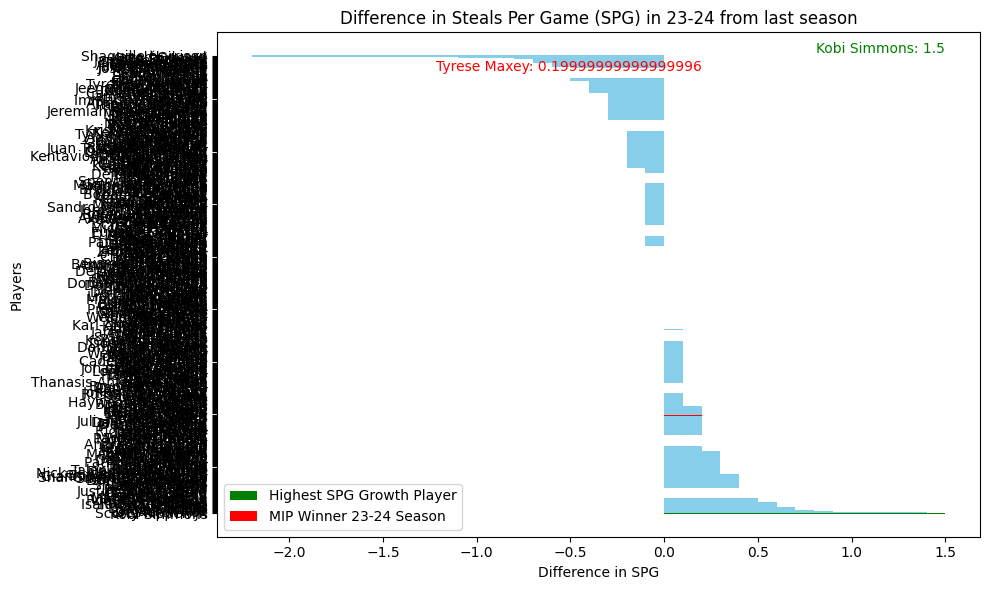

In [91]:
def get_steals_diff(defense, mip, year):

    defense.dropna(inplace=True)

    # Sort the DataFrame by the difference in steals per game
    sorted_growth_df = defense.sort_values(by='steals', ascending=False)

    # Plotting the difference in steals per game for all players
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_growth_df.index, sorted_growth_df['steals'], color='skyblue')
    plt.title(f'Difference in Steals Per Game (SPG) in {year} from last season')
    plt.xlabel('Difference in SPG')
    plt.ylabel('Players')

    # Highlighting the player with the highest difference
    highest_difference_player = sorted_growth_df.index[0]
    highest_difference = sorted_growth_df.loc[highest_difference_player, 'steals']
    plt.barh(highest_difference_player, highest_difference, color='green', label='Highest SPG Growth Player')

    # Annotating the highest difference
    plt.text(highest_difference, len(sorted_growth_df) - 1, f"{highest_difference_player}: {highest_difference}", va='bottom', ha= 'right', color= 'green')

    # Highlighting the award player
    if mip in defense.index:
        award_player_difference = defense.loc[mip, 'steals']
        plt.barh(mip, award_player_difference, color='red', label=f'MIP Winner {year} Season')
        plt.text(award_player_difference, defense.index.get_loc(mip),f'{mip}: {award_player_difference}', va='bottom', ha= 'right', color = 'red')

    plt.legend(loc= 'lower left')
    plt.tight_layout()
    plt.show()

count = 0
for defense in allDefense:
    mip = pastMipWinners[count]
    get_steals_diff(defense, mip, years[count])
    count+=1

Next, we are are going to create graphs that are going to analyze the growth or decline in defensive performance, specifically in terms of Defensive Rebounds Per Game (DRPG), across multiple basketball seasons, highlighting notable players and their improvements. We are going to do this by first cleaning the said data again due to the player needing to be the in the NBA for 2 seasons, then calulating the difference in defensive rebounds, then visualize the data by graphing it. Any player not in the NBA for 2 seasons will be dropped from said table. The player with the highest growth in steals per game is highlighted in green and the most improved player is highlighted in red.

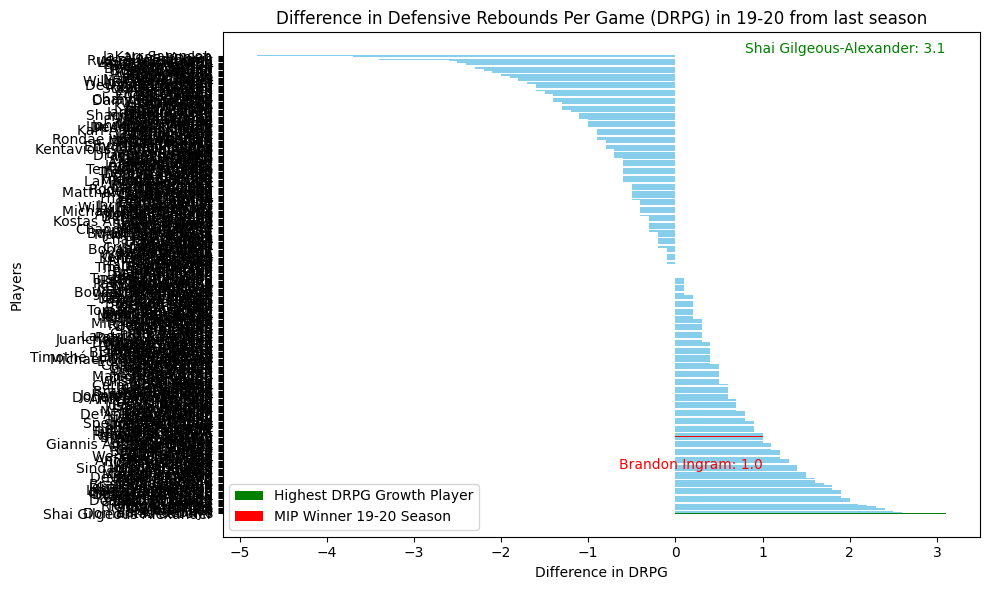

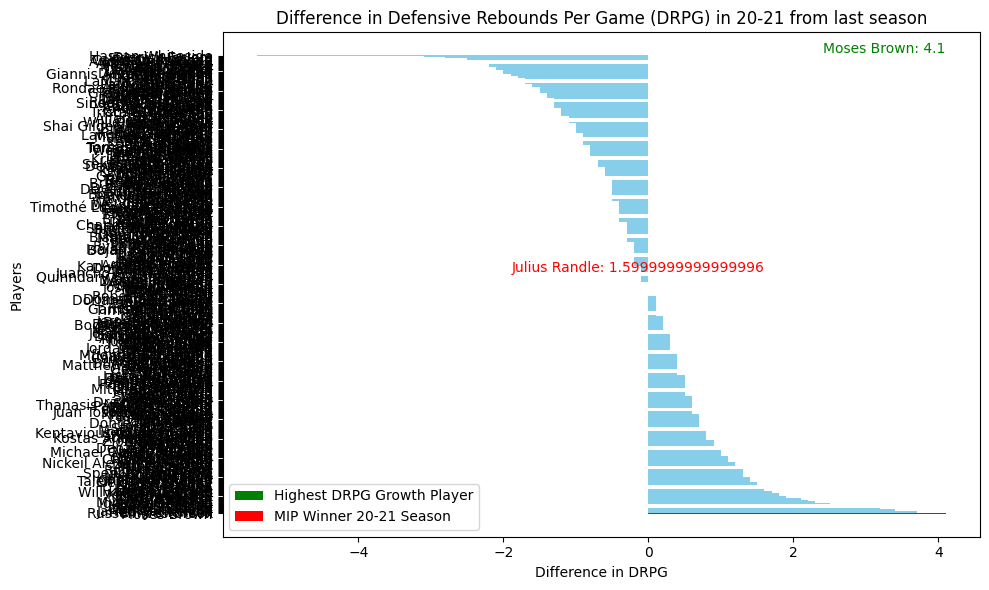

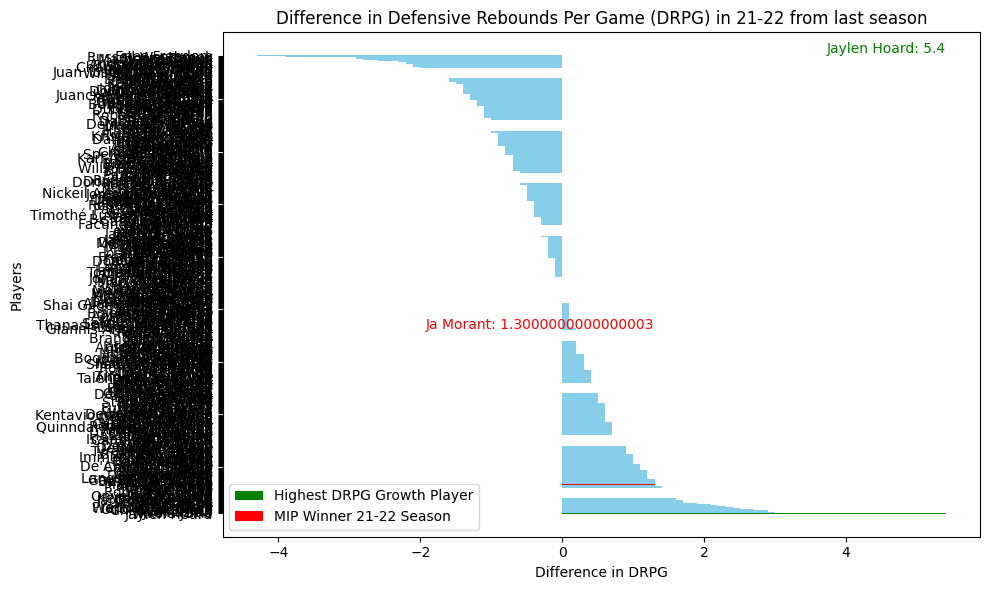

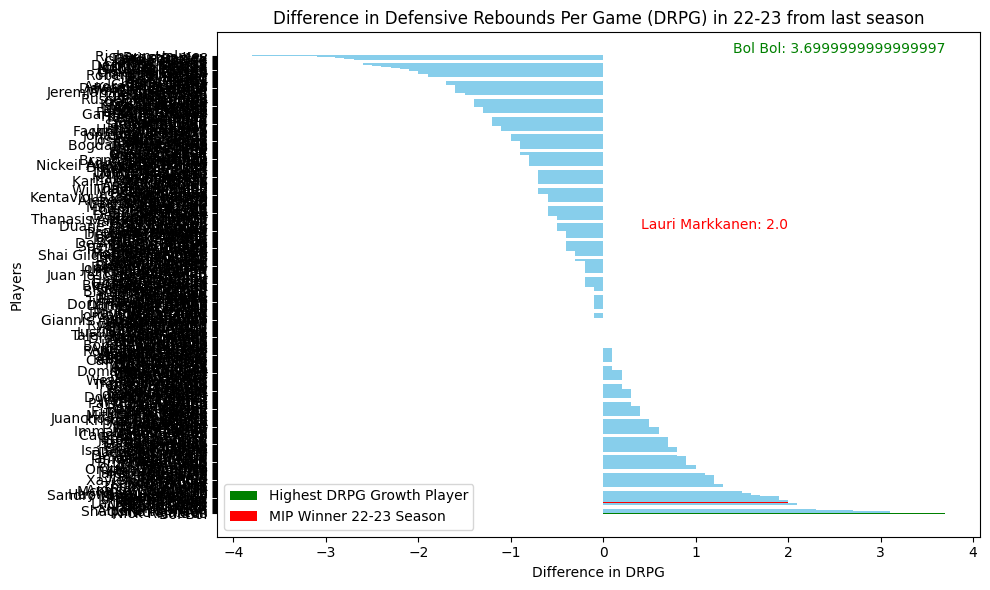

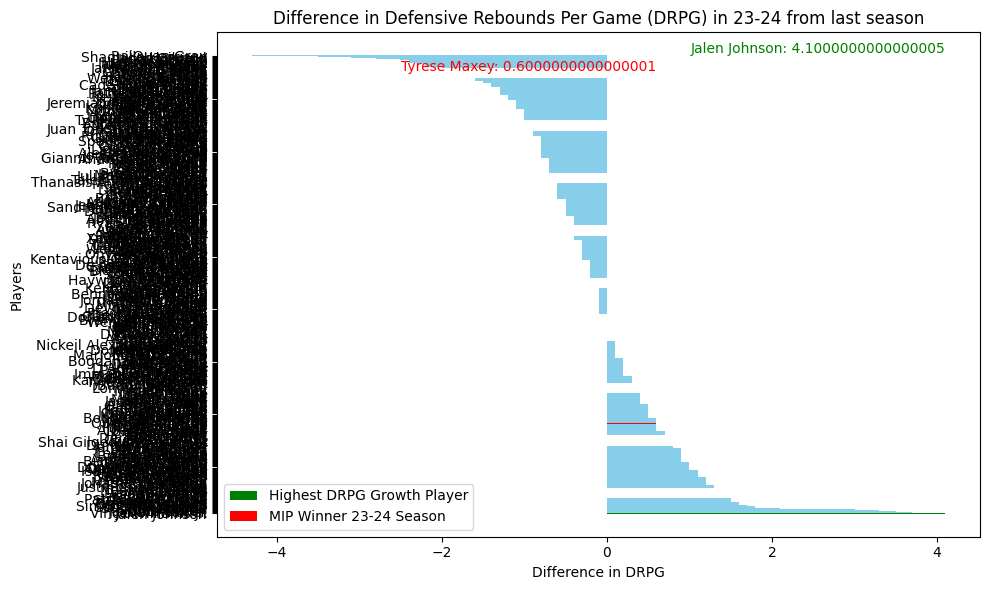

In [41]:
def get_Dr_diff(defense, mip, year):

    # Any player that cannot stay in the league will have NaN values and thus will be dropped from the table
    defense.dropna(inplace=True)

    # Sort the DataFrame by the difference in DRPG
    sorted_growth_df = defense.sort_values(by='defensive rebounds', ascending=False)

    # Plotting the difference in PPG for all players
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_growth_df.index, sorted_growth_df['defensive rebounds'], color='skyblue')
    plt.title(f'Difference in Defensive Rebounds Per Game (DRPG) in {year} from last season')
    plt.xlabel('Difference in DRPG')
    plt.ylabel('Players')

    # Highlighting the player with the highest difference
    highest_difference_player = sorted_growth_df.index[0]
    highest_difference = sorted_growth_df.loc[highest_difference_player, 'defensive rebounds']
    plt.barh(highest_difference_player, highest_difference, color='green', label='Highest DRPG Growth Player')

    # Annotating the highest difference
    plt.text(highest_difference, len(sorted_growth_df) - 1, f"{highest_difference_player}: {highest_difference}", va='bottom', ha= 'right', color= 'green')

    # Highlighting the award player
    if mip in defense.index:
        award_player_difference = defense.loc[mip, 'defensive rebounds']
        plt.barh(mip, award_player_difference, color='red', label=f'MIP Winner {year} Season')
        plt.text(award_player_difference, defense.index.get_loc(mip),f'{mip}: {award_player_difference}', va='bottom', ha= 'right', color = 'red')

    plt.legend(loc= 'lower left')
    plt.tight_layout()
    plt.show()

count = 0
for defense in allDefense:
    mip = pastMipWinners[count]
    get_Dr_diff(defense, mip, years[count])
    count+=1

Next, we are are going to create graphs that are going to analyze the growth or decline in defensive performance, specifically in terms of Defensive Rebounds Per Game (DRPG), across multiple basketball seasons, highlighting notable players and their improvements. We are going to do this by first cleaning the said data again due to the player needing to be the in the NBA for 2 seasons, then calulating the difference in defensive rebounds, then visualize the data by graphing it. Any player not in the NBA for 2 seasons will be dropped from said table. The player with the highest growth in defensive rebounds per game is highlighted in green and the most improved player is highlighted in red.

This next section will conduct a regression analysis on the player rankings and their statistics for the year. We going to analyze the relationship between defensive player statistics and player rankings across different basketball seasons, specifically focusing on predicting player rankings based on their defensive performance and evaluating the accuracy of these predictions. We are using the defensive rankings and stats that we have used/found above including blocks per game, steals per game, and defensive rebounds per game.

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                 -0.684
Method:                 Least Squares   F-statistic:                    0.3229
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.814
Time:                        16:41:30   Log-Likelihood:                -14.560
No. Observations:                   6   AIC:                             37.12
Df Residuals:                       2   BIC:                             36.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 16.9049      8

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


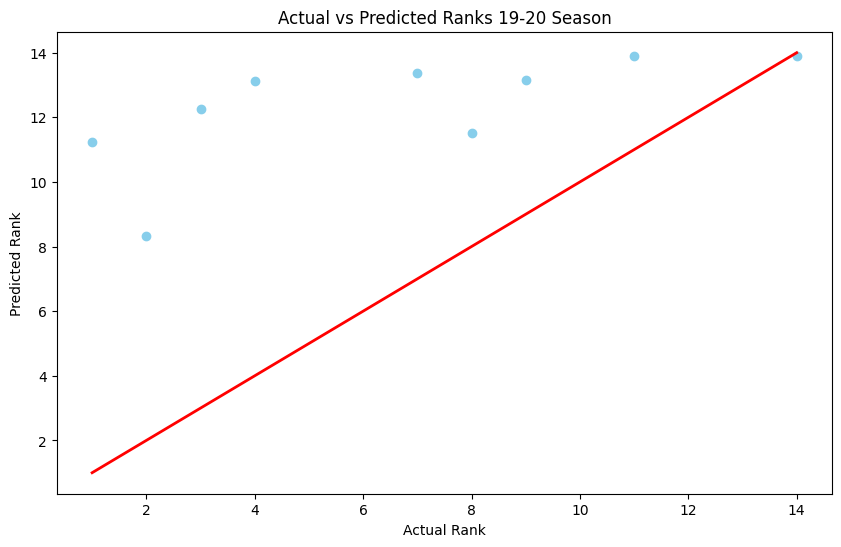

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.045
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.438
Time:                        16:41:30   Log-Likelihood:                -31.531
No. Observations:                  10   AIC:                             71.06
Df Residuals:                       6   BIC:                             72.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.2193      3

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


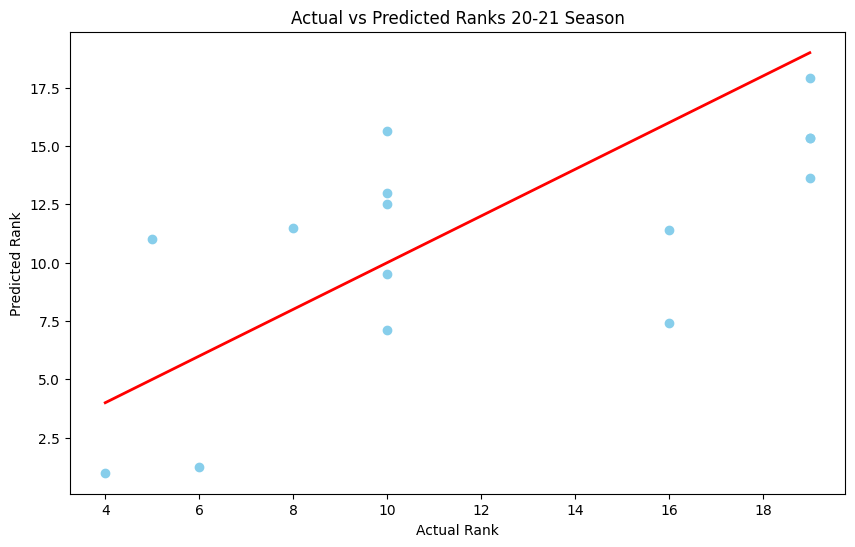

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 May 2024   Prob (F-statistic):                nan
Time:                        16:41:30   Log-Likelihood:                 116.33
No. Observations:                   4   AIC:                            -224.7
Df Residuals:                       0   BIC:                            -227.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                210.0000       

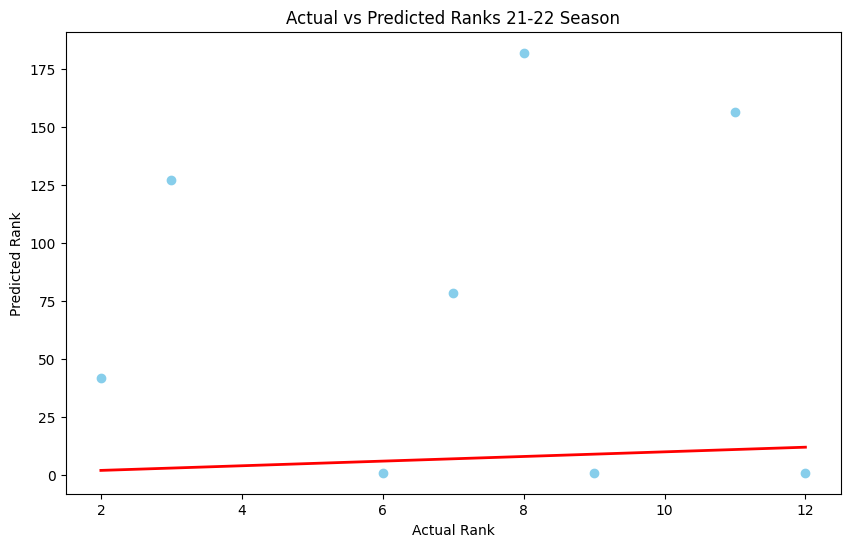

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     2.213
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.450
Time:                        16:41:30   Log-Likelihood:                -9.4803
No. Observations:                   5   AIC:                             26.96
Df Residuals:                       1   BIC:                             25.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9383      2

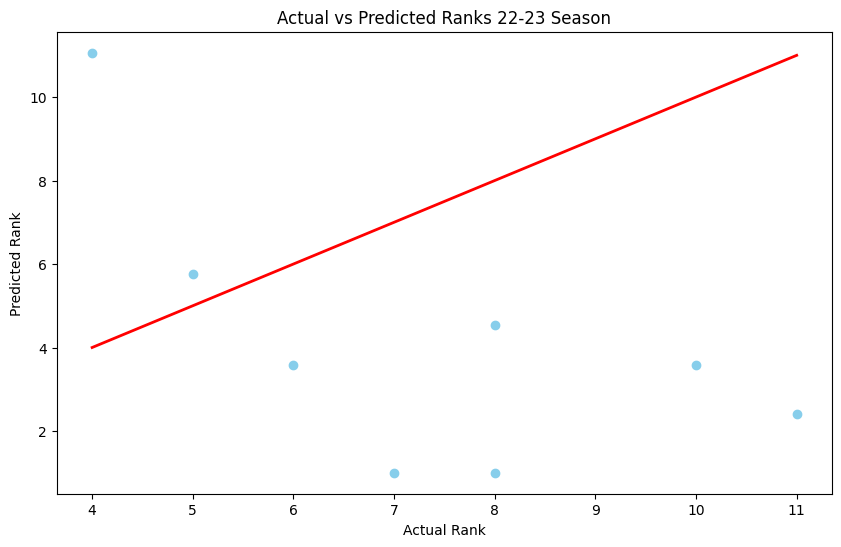

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     4.125
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.344
Time:                        16:41:30   Log-Likelihood:                -6.4269
No. Observations:                   5   AIC:                             20.85
Df Residuals:                       1   BIC:                             19.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.0057      2

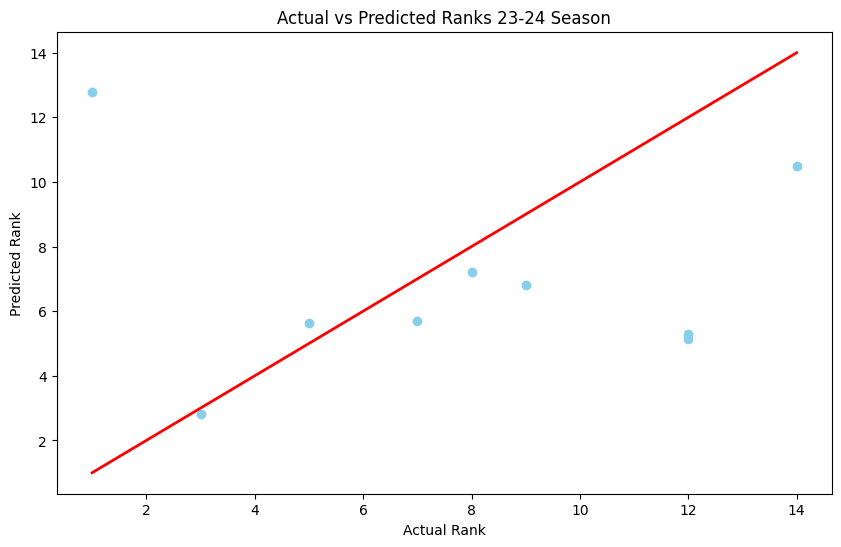

In [95]:
def regression3(pureDefensive, mipdata,year):
    pureDefensive = pd.merge(pureDefensive, mipdata, left_index=True, right_index=True)
    pureDefensive['Rank'] = pureDefensive['Rank'].astype(int)
    X = pureDefensive[['blocks', 'steals', 'defensive rebounds']]
    y = pureDefensive['Rank']
    X = sm.add_constant(X)
    
    X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.6, random_state=42)
    
    # Train the model
    model1 = sm.OLS(y1_train, X1_train).fit()
    print(model1.summary())

    # Make predictions
    y1_pred = model1.predict(X1_test)
    y1_pred = np.maximum(y1_pred,1)


    # Calculate evaluation metrics
    mse1 = mean_squared_error(y1_test, y1_pred)
    r21 = r2_score(y1_test, y1_pred)
    print(f'Mean Squared Error: {mse1}')
    print(f'R-squared: {r21}')

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y1_test, y1_pred, color='skyblue')
    plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linewidth=2)
    plt.title(f'Actual vs Predicted Ranks {year} Season')
    plt.xlabel('Actual Rank')
    plt.ylabel('Predicted Rank')
    plt.show()
    
for i,j in enumerate(allDefense):
    regression3(j, listMip[i], years[i])


In the case of running regressions on the defensive stats throughout the years, from interpreting the F-stats, p-values, along with the coefficients, it has been found that the correlations among the different criteria are statistically insignificant among all the years of the defensive years data.

Here, we are trying to  to visualize the correlations between various defensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2019-2020 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

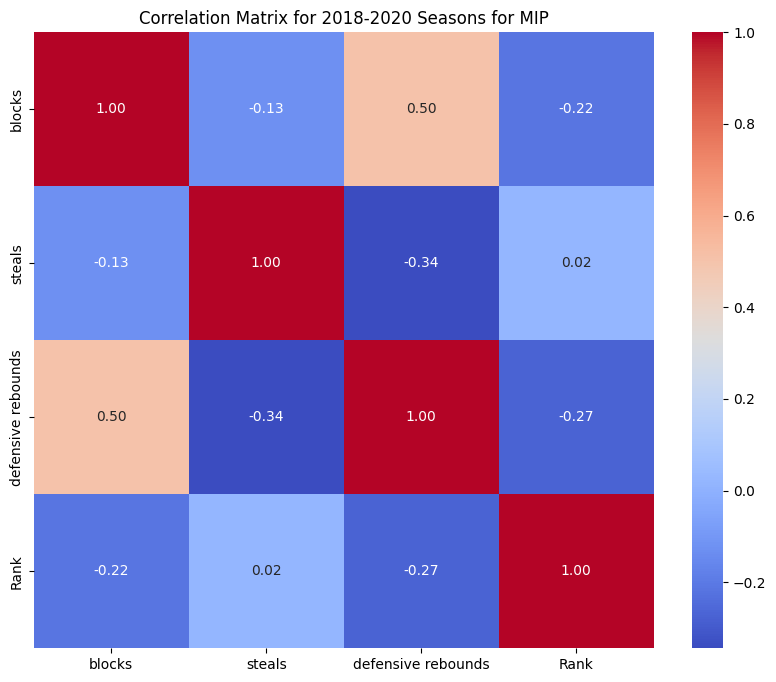

In [96]:
def corrMDefensive1820(pureDefensive1820,mipdata1920):   

    pureDefensive1820 = pd.merge(pureDefensive1820, mipdata1920, left_index=True, right_index=True)
    correlation_matrix4 = pureDefensive1820.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2018-2020 Seasons for MIP')
    plt.show()
corrMDefensive1820(pureDefensive1820,mipdata1920) 


Here, we are trying to  to visualize the correlations between various defensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2020-2021 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

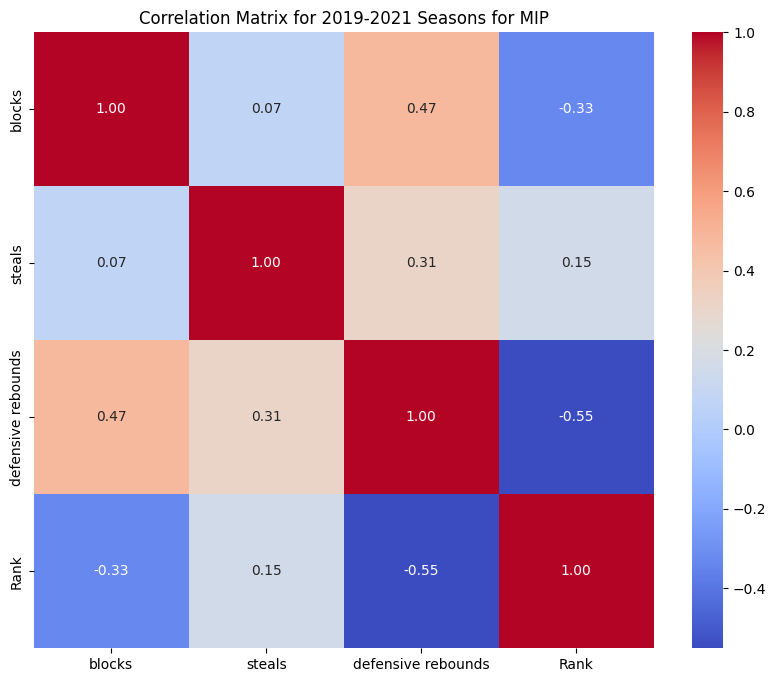

In [423]:
def corrMDefensive1921(pureDefensive1921,mipdata2021):   

    pureDefensive1921 = pd.merge(pureDefensive1921, mipdata2021, left_index=True, right_index=True)
    correlation_matrix4 = pureDefensive1921.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2019-2021 Seasons for MIP')
    plt.show()
corrMDefensive1921(pureDefensive1921,mipdata2021) 


Here, we are trying to  to visualize the correlations between various defensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2021-2022 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

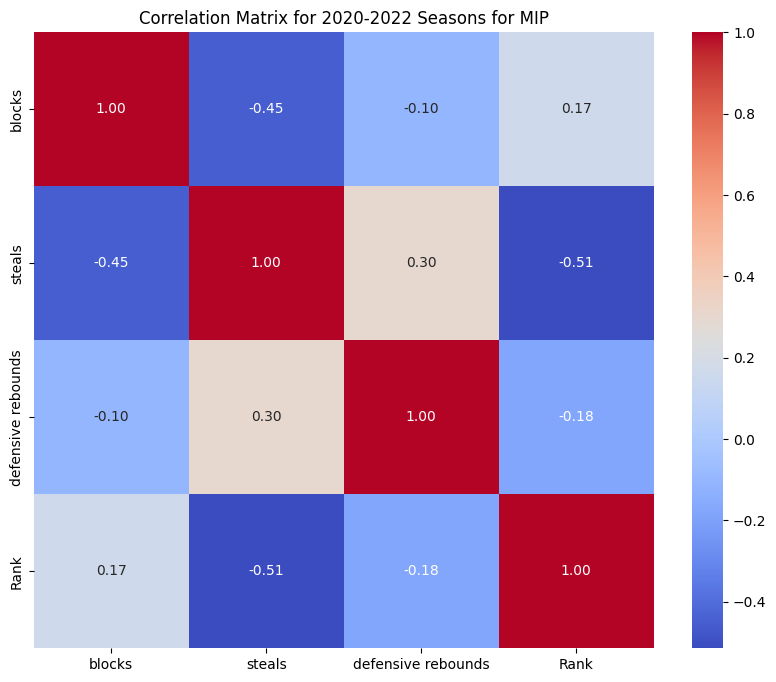

In [421]:
def corrMDeffensive2022(pureDefensive2022,mipdata2122):   

    pureDefensive2022 = pd.merge(pureDefensive2022, mipdata2122, left_index=True, right_index=True)
    correlation_matrix4 = pureDefensive2022.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2020-2022 Seasons for MIP')
    plt.show()
corrMDeffensive2022(pureDefensive2022,mipdata2122) 


Here, we are trying to  to visualize the correlations between various defensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2022-2023 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

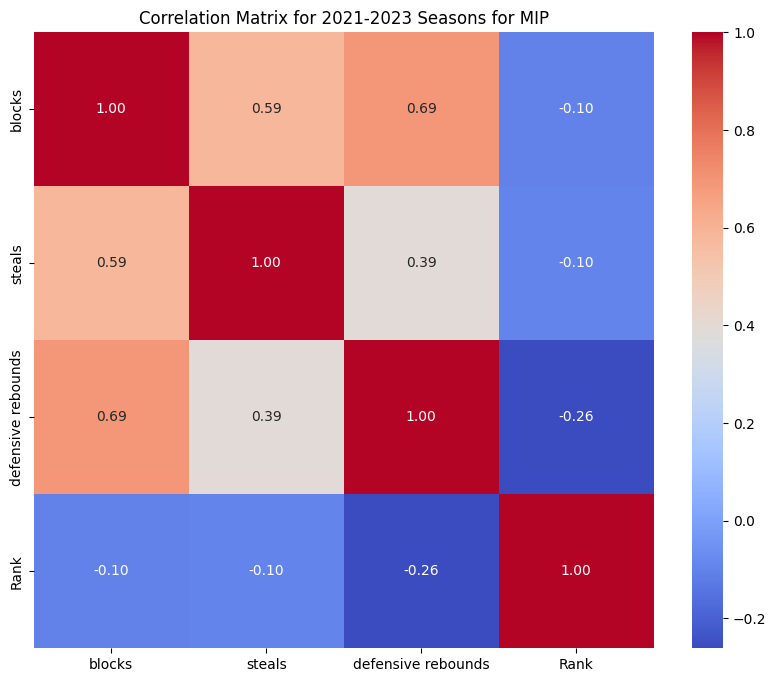

In [428]:
def corrMDefensive2123(pureDefensive2123,mipdata2223):   

    pureDefensive2123 = pd.merge(pureDefensive2123, mipdata2223, left_index=True, right_index=True)
    correlation_matrix4 = pureDefensive2123.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2021-2023 Seasons for MIP')
    plt.show()
corrMDefensive2123(pureDefensive2123,mipdata2223) 


Here, we are trying to  to visualize the correlations between various defensive player statistics and the likelihood of a player being selected as the Most Improved Player for the 2023-2024 basketball season. We are plotting the data using a heat map. The cells in the heatmap are color-coded based on the correlation values, where positive correlations are represented in reddish tones and negative correlations in bluish tones.

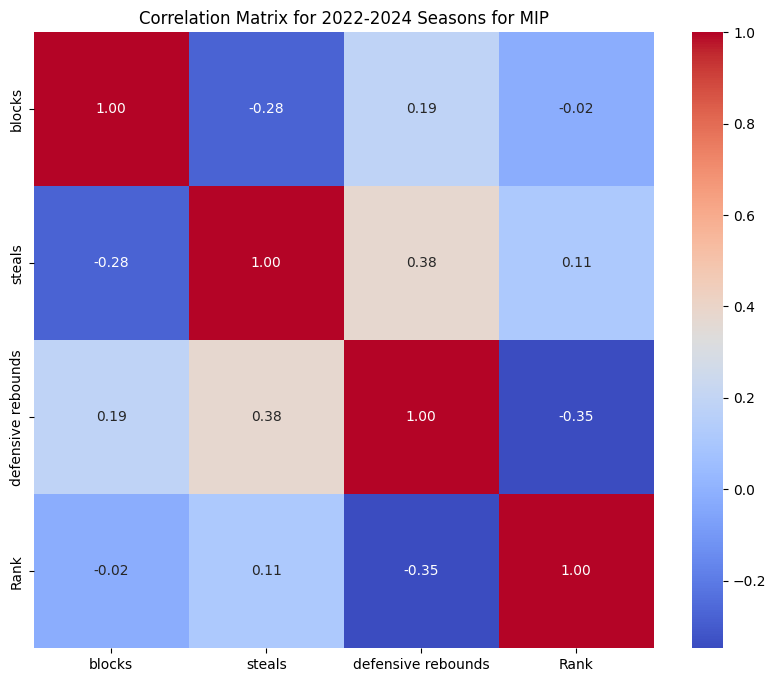

In [430]:
def corrMDefensive2224(pureDefensive2224,mipdata2324):   

    pureDefensive2224 = pd.merge(pureDefensive2224, mipdata2324, left_index=True, right_index=True)
    correlation_matrix4 = pureDefensive2224.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix4, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Matrix for 2022-2024 Seasons for MIP') 
    plt.show()
corrMDefensive2224(pureDefensive2224,mipdata2324) 


CONCLUSION

Based on the sample size of the data and the results, the parameters selected were not statistically significant in determining the rank of a player to be in the running for the Most Improved Player(MIP) award.  The project delves into the analysis of basketball player performance data with a specific emphasis on comparing the Most Improved Players (MIPs) over multiple NBA seasons to who could’ve won it based on statistics. Initially, the datasets containing offensive and defensive player statistics are cleaned and preprocessed to ensure data integrity. This involves extracting relevant metrics such as points, assists, rebounds, steals, and blocks, while handling missing values appropriately. Subsequently, the project computes the differences in player performance metrics between consecutive seasons to identify significant improvements or declines over time. Various regression analyses are conducted to explore the relationship between player statistics and rankings, allowing for predictions of player rankings based on their performance metrics. We employ visualization techniques such as bar charts and heatmaps to present the findings in a visually appealing and comprehensible manner. Overall, the project aims to provide valuable insights into player development trends and the factors influencing Most Improved Player (MIP) selections in the NBA.  In future studies, insights could be made using all data from the inception of the nba to draw development correlations between players with regards to constraints on years stat checking began as well as constraints with processing power over large data sets.